# import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pwd 


'C:\\Users\\David'

In [3]:
covidInfections = pd.read_excel('C:\\Users\\David\\Downloads\\cases.xlsx')

covidDeaths = pd.read_excel('C:\\Users\\David\\Downloads\\deaths.xlsx')

In [4]:
covidDeaths.shape


(11313, 5)

In [5]:
#check df 
covidInfections.shape


(89817, 5)

In [6]:
covidDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11313 entries, 0 to 11312
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   areaCode                        11313 non-null  object        
 1   areaName                        11313 non-null  object        
 2   areaType                        11313 non-null  object        
 3   date                            11313 non-null  datetime64[ns]
 4   newOnsDeathsByRegistrationDate  11313 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 442.0+ KB


In [7]:
covidDeaths

,areaCode,areaName,areaType,date,newOnsDeathsByRegistrationDate
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0
1,E06000014,York,utla,2021-06-25,0
2,E06000050,Cheshire West and Chester,utla,2021-06-25,1
3,E08000001,Bolton,utla,2021-06-25,7
4,E08000016,Barnsley,utla,2021-06-25,0
...,...,...,...,...,...
11308,E06000037,West Berkshire,utla,2020-03-27,2
11309,E08000035,Leeds,utla,2020-03-27,2
11310,E09000017,Hillingdon,utla,2020-03-27,10
11311,E10000012,Essex,utla,2020-03-27,4


In [8]:
#checking for nulls
covidInfections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89817 entries, 0 to 89816
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   areaCode               89817 non-null  object        
 1   areaName               89817 non-null  object        
 2   areaType               89817 non-null  object        
 3   date                   89817 non-null  datetime64[ns]
 4   newCasesByPublishDate  89817 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.4+ MB


In [9]:
##can we find more data that shows how old each area is? then we can sort by how many cases in each area, and see how old each area is.

In [10]:
#rename the column to make it easier to understand

covidInfections.rename(columns={"newCasesByPublishDate":"cases"}, inplace=True)
covidDeaths.rename(columns={"newOnsDeathsbyRegistrationDate":"deaths"}, inplace=True)

In [11]:
#we can see that there are 214 unique area names/codes in the dataset
#we can see that there is 1 unique type of area in the dataset
#from inspecting the dataset we can see that it is fairly clean already -- it has no missing values or NaNs.

In [12]:
covidInfections.areaCode.nunique()

214

In [13]:
covidDeaths.date.nunique()

68

In [14]:
df = covidDeaths
df.date.nunique()


#each date is unique within its own area code

68

In [15]:
df1 = covidInfections
df1
df1.date.nunique()
#436 rows
#436 unique rows

#solution is left join on date - NOPE
#solution is left join on date AND areaCode

#drop duplicate columns from df1

df1 = df1.drop (df.columns [ [1, 2]], axis=1)

#merge df and df1
df3 = df.merge(df1,on=['date','areaCode'], how='left')
#check for NaN
df3.isnull().sum()

areaCodes = df['areaCode']

#check one areacode from the dataset
x = df3[df3['areaCode']==df3['areaCode'][0]]


y = (list(set(areaCodes)))
z = 0

nmbrs = [0,0]

d = [] #empty dictionary

for i in y:
    z+=1
    variable = (df3[df3['areaCode']==i])
    d.append(variable)
    

d

#we can see there are two missing values in the cases column

[       areaCode           areaName areaType       date  \
 8670  E06000043  Brighton and Hove     utla 2021-06-25   
 8681  E06000043  Brighton and Hove     utla 2021-06-18   
 8692  E06000043  Brighton and Hove     utla 2021-06-11   
 8703  E06000043  Brighton and Hove     utla 2021-06-04   
 8714  E06000043  Brighton and Hove     utla 2021-05-28   
 ...         ...                ...      ...        ...   
 9330  E06000043  Brighton and Hove     utla 2020-05-01   
 9341  E06000043  Brighton and Hove     utla 2020-04-24   
 9352  E06000043  Brighton and Hove     utla 2020-04-17   
 9363  E06000043  Brighton and Hove     utla 2020-04-10   
 9374  E06000043  Brighton and Hove     utla 2020-04-03   
 
       newOnsDeathsByRegistrationDate  cases  
 8670                               0   76.0  
 8681                               0   59.0  
 8692                               0   32.0  
 8703                               0   22.0  
 8714                               0   11.0  
 ...    

In [16]:
df3.info()
df3.rename(columns={"newOnsDeathsByRegistrationDate":"deaths"}, inplace=True)
df3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11313 entries, 0 to 11312
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   areaCode                        11313 non-null  object        
 1   areaName                        11313 non-null  object        
 2   areaType                        11313 non-null  object        
 3   date                            11313 non-null  datetime64[ns]
 4   newOnsDeathsByRegistrationDate  11313 non-null  int64         
 5   cases                           10619 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 938.7+ KB


,areaCode,areaName,areaType,date,deaths,cases
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37.0
1,E06000014,York,utla,2021-06-25,0,84.0
2,E06000050,Cheshire West and Chester,utla,2021-06-25,1,85.0
3,E08000001,Bolton,utla,2021-06-25,7,118.0
4,E08000016,Barnsley,utla,2021-06-25,0,78.0
...,...,...,...,...,...,...
11308,E06000037,West Berkshire,utla,2020-03-27,2,NaN
11309,E08000035,Leeds,utla,2020-03-27,2,NaN
11310,E09000017,Hillingdon,utla,2020-03-27,10,NaN
11311,E10000012,Essex,utla,2020-03-27,4,NaN


In [17]:
demo = pd.read_excel('C:\\Users\\David\\Downloads\\demo.xlsx')
demo.rename(columns={"Code":"areaCode"}, inplace=True)
demo


,areaCode,Name,Geography,All ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,K02000001,UNITED KINGDOM,Country,67081234,701897,730219,759354,783321,807539,806745,...,373288,350944,322102,292999,264997,231822,206428,185189,161430,609503
1,K03000001,GREAT BRITAIN,Country,65185724,679949,707375,735831,759033,782406,781788,...,363738,342324,313997,285821,258489,226198,201222,180762,157634,595576
2,K04000001,ENGLAND AND WALES,Country,59719724,631314,656313,682886,704584,725691,724207,...,332721,313223,287709,261753,236742,207218,184755,165926,145102,551827
3,E92000001,ENGLAND,Country,56550138,601913,625476,650226,671016,690816,689190,...,313081,294838,271063,246429,223058,195010,173861,156497,136917,521067
4,E12000001,NORTH EAST,Region,2680763,25311,26882,27877,28895,29813,29512,...,16170,15310,14109,12247,11364,9734,8646,7607,6658,22576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,N09000006,Fermanagh and Omagh,Local Government District,117337,1381,1427,1577,1560,1614,1563,...,562,526,530,436,379,356,310,272,252,915
416,N09000007,Lisburn and Castlereagh,Local Government District,146452,1718,1795,1850,1789,1771,1873,...,847,727,653,656,554,464,455,390,315,1117
417,N09000008,Mid and East Antrim,Local Government District,139443,1420,1455,1584,1666,1631,1698,...,812,714,693,612,590,508,416,361,321,1150
418,N09000009,Mid Ulster,Local Government District,148953,2062,2062,2147,2217,2209,2173,...,665,554,495,491,440,381,357,301,251,947


In [18]:
demo.areaCode.nunique()

420

In [19]:
areaCodes.nunique()

171

In [20]:
demo = pd.read_excel('C:\\Users\\David\\Downloads\\demo.xlsx')
demo.rename(columns={"Code":"areaCode"}, inplace=True)
demo
demo.info()
demo.rename(columns={"All ages":"all"}, inplace=True)
demo.rename(columns={"Geography":"geography"}, inplace=True)
demo.rename(columns={"Name":"name"}, inplace=True)
demo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 95 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   areaCode   420 non-null    object
 1   Name       420 non-null    object
 2   Geography  420 non-null    object
 3   All ages   420 non-null    int64 
 4   0          420 non-null    int64 
 5   1          420 non-null    int64 
 6   2          420 non-null    int64 
 7   3          420 non-null    int64 
 8   4          420 non-null    int64 
 9   5          420 non-null    int64 
 10  6          420 non-null    int64 
 11  7          420 non-null    int64 
 12  8          420 non-null    int64 
 13  9          420 non-null    int64 
 14  10         420 non-null    int64 
 15  11         420 non-null    int64 
 16  12         420 non-null    int64 
 17  13         420 non-null    int64 
 18  14         420 non-null    int64 
 19  15         420 non-null    int64 
 20  16         420 non-null    int64

,areaCode,name,geography,all,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,K02000001,UNITED KINGDOM,Country,67081234,701897,730219,759354,783321,807539,806745,...,373288,350944,322102,292999,264997,231822,206428,185189,161430,609503
1,K03000001,GREAT BRITAIN,Country,65185724,679949,707375,735831,759033,782406,781788,...,363738,342324,313997,285821,258489,226198,201222,180762,157634,595576
2,K04000001,ENGLAND AND WALES,Country,59719724,631314,656313,682886,704584,725691,724207,...,332721,313223,287709,261753,236742,207218,184755,165926,145102,551827
3,E92000001,ENGLAND,Country,56550138,601913,625476,650226,671016,690816,689190,...,313081,294838,271063,246429,223058,195010,173861,156497,136917,521067
4,E12000001,NORTH EAST,Region,2680763,25311,26882,27877,28895,29813,29512,...,16170,15310,14109,12247,11364,9734,8646,7607,6658,22576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,N09000006,Fermanagh and Omagh,Local Government District,117337,1381,1427,1577,1560,1614,1563,...,562,526,530,436,379,356,310,272,252,915
416,N09000007,Lisburn and Castlereagh,Local Government District,146452,1718,1795,1850,1789,1771,1873,...,847,727,653,656,554,464,455,390,315,1117
417,N09000008,Mid and East Antrim,Local Government District,139443,1420,1455,1584,1666,1631,1698,...,812,714,693,612,590,508,416,361,321,1150
418,N09000009,Mid Ulster,Local Government District,148953,2062,2062,2147,2217,2209,2173,...,665,554,495,491,440,381,357,301,251,947


In [21]:
df4 = df3.merge(demo,on=['areaCode'], how='left')

In [22]:
demo

#total = demo[65+66+67+68+69+70+71+72+73+74+75+76+77+78+79+80+81+82+83+84+85+86+87+88+89+90]

df4['66']

y = (list(set(areaCodes)))


m = [] #empty list

for i in y:
  
    variable = (df4[df4['areaCode']==i])
    m.append(variable)
    




    


In [23]:
demo

,areaCode,name,geography,all,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,K02000001,UNITED KINGDOM,Country,67081234,701897,730219,759354,783321,807539,806745,...,373288,350944,322102,292999,264997,231822,206428,185189,161430,609503
1,K03000001,GREAT BRITAIN,Country,65185724,679949,707375,735831,759033,782406,781788,...,363738,342324,313997,285821,258489,226198,201222,180762,157634,595576
2,K04000001,ENGLAND AND WALES,Country,59719724,631314,656313,682886,704584,725691,724207,...,332721,313223,287709,261753,236742,207218,184755,165926,145102,551827
3,E92000001,ENGLAND,Country,56550138,601913,625476,650226,671016,690816,689190,...,313081,294838,271063,246429,223058,195010,173861,156497,136917,521067
4,E12000001,NORTH EAST,Region,2680763,25311,26882,27877,28895,29813,29512,...,16170,15310,14109,12247,11364,9734,8646,7607,6658,22576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,N09000006,Fermanagh and Omagh,Local Government District,117337,1381,1427,1577,1560,1614,1563,...,562,526,530,436,379,356,310,272,252,915
416,N09000007,Lisburn and Castlereagh,Local Government District,146452,1718,1795,1850,1789,1771,1873,...,847,727,653,656,554,464,455,390,315,1117
417,N09000008,Mid and East Antrim,Local Government District,139443,1420,1455,1584,1666,1631,1698,...,812,714,693,612,590,508,416,361,321,1150
418,N09000009,Mid Ulster,Local Government District,148953,2062,2062,2147,2217,2209,2173,...,665,554,495,491,440,381,357,301,251,947


In [24]:
#add up all the over 65s
totalOver65 = demo['65']+demo['66']+demo['67']+demo['68']+demo['69']+demo['70']+demo['71']+demo['72']+demo['73']+demo['74']+demo['75']+demo['76']+demo['77']+demo['78']+demo['79']+demo['80']+demo['81']+demo['82']+demo['83']+demo['84']+demo['85']+demo['86']+demo['87']+demo['88']+demo['89']+demo['90+']


totalOver65

df = demo.assign(tot65 = totalOver65)


d = {'tot': totalOver65, 'all' : df['all']}
df = pd.DataFrame(d)



df['percentOver65'] = round(((df['tot'] / df['all'])*100),2)
#df[df['per']<50]



sorted_df = df.sort_values(by='percentOver65')



#df = pandas.DataFrame.from_dict(data)
#newdf = demo['all']
#newdf

#+'67'+'68'+'69'+'70'+'71'+'72'+'73'+'74'+'75'+'76'+'77'+'78'+'79'+'80'+'81'+'82'+'83'+'84'+'85'+'86'+'87'+'88'+'89'+'90+']
#lets just grab the ages and transform the numbers into percentage of over and under 65s

#THOGUHTS FROM TODAY

#the dictionary won't work because there are duplicate values.  better way would be to give each area code a percentage of 65+ people and give them a binary classifier based on the findings. Then compare cases and deaths of each classifier

df4


,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,0,...,81,82,83,84,85,86,87,88,89,90+
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37.0,Redcar and Cleveland,Unitary Authority,137228.0,1286.0,...,1002.0,897.0,852.0,720.0,650.0,542.0,482.0,430.0,368.0,1365.0
1,E06000014,York,utla,2021-06-25,0,84.0,York,Unitary Authority,211012.0,1701.0,...,1210.0,1173.0,1103.0,1055.0,904.0,777.0,656.0,588.0,548.0,2131.0
2,E06000050,Cheshire West and Chester,utla,2021-06-25,1,85.0,Cheshire West and Chester,Unitary Authority,343823.0,3366.0,...,2206.0,2137.0,1968.0,1758.0,1540.0,1290.0,1186.0,1070.0,997.0,3591.0
3,E08000001,Bolton,utla,2021-06-25,7,118.0,Bolton,Metropolitan District,288248.0,3748.0,...,1575.0,1395.0,1227.0,1067.0,967.0,792.0,758.0,671.0,563.0,2070.0
4,E08000016,Barnsley,utla,2021-06-25,0,78.0,Barnsley,Metropolitan District,248071.0,2647.0,...,1373.0,1323.0,1158.0,1087.0,947.0,817.0,780.0,581.0,577.0,2048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,E06000037,West Berkshire,utla,2020-03-27,2,NaN,West Berkshire,Unitary Authority,158465.0,1553.0,...,876.0,844.0,747.0,674.0,599.0,505.0,466.0,443.0,392.0,1439.0
11309,E08000035,Leeds,utla,2020-03-27,2,NaN,Leeds,Metropolitan District,798786.0,9031.0,...,3713.0,3679.0,3407.0,3166.0,2906.0,2390.0,2075.0,1864.0,1608.0,5437.0
11310,E09000017,Hillingdon,utla,2020-03-27,10,NaN,Hillingdon,London Borough,309014.0,4036.0,...,1265.0,1256.0,1203.0,1125.0,981.0,867.0,764.0,691.0,581.0,2171.0
11311,E10000012,Essex,utla,2020-03-27,4,NaN,Essex,County,1497759.0,15708.0,...,9430.0,8733.0,8102.0,7443.0,6709.0,5953.0,5227.0,4745.0,4162.0,15314.0


In [25]:

df5 = df4.merge(df,on=['all'], how='left')
df5

df5.drop(df5.columns.difference(['areaCode','areaName', 'areaType', 'date','deaths','cases', 'all', 'tot', 'percentOver65']), 1, inplace=True)
df5.rename(columns={'tot':'sfp'}, inplace=True)
df5.rename(columns={'percentOver65':'percentageSfp'},inplace=True)
df5.rename(columns={'all':'population'},inplace=True)
df5



    




,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37.0,137228.0,31288.0,22.80
1,E06000014,York,utla,2021-06-25,0,84.0,211012.0,38874.0,18.42
2,E06000050,Cheshire West and Chester,utla,2021-06-25,1,85.0,343823.0,74915.0,21.79
3,E08000001,Bolton,utla,2021-06-25,7,118.0,288248.0,50056.0,17.37
4,E08000016,Barnsley,utla,2021-06-25,0,78.0,248071.0,48660.0,19.62
...,...,...,...,...,...,...,...,...,...
11308,E06000037,West Berkshire,utla,2020-03-27,2,NaN,158465.0,31106.0,19.63
11309,E08000035,Leeds,utla,2020-03-27,2,NaN,798786.0,123784.0,15.50
11310,E09000017,Hillingdon,utla,2020-03-27,10,NaN,309014.0,42033.0,13.60
11311,E10000012,Essex,utla,2020-03-27,4,NaN,1497759.0,309912.0,20.69


In [26]:
df = df5


In [27]:
df.dropna(inplace=True)

In [28]:
df2 = df5[df5['areaName']=='Bridgend']
df2

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp
4451,W06000013,Bridgend,utla,2021-06-25,0,7.0,147539.0,30168.0,20.45
4465,W06000013,Bridgend,utla,2021-06-18,0,7.0,147539.0,30168.0,20.45
4479,W06000013,Bridgend,utla,2021-06-11,0,4.0,147539.0,30168.0,20.45
4493,W06000013,Bridgend,utla,2021-06-04,0,1.0,147539.0,30168.0,20.45
4507,W06000013,Bridgend,utla,2021-05-28,0,1.0,147539.0,30168.0,20.45
4521,W06000013,Bridgend,utla,2021-05-21,0,2.0,147539.0,30168.0,20.45
4535,W06000013,Bridgend,utla,2021-05-14,2,1.0,147539.0,30168.0,20.45
4549,W06000013,Bridgend,utla,2021-05-07,0,0.0,147539.0,30168.0,20.45
4563,W06000013,Bridgend,utla,2021-04-30,2,1.0,147539.0,30168.0,20.45
4577,W06000013,Bridgend,utla,2021-04-23,0,0.0,147539.0,30168.0,20.45


In [29]:
df = df5[df5['areaName']=='Cardiff']
df

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp
8676,W06000015,Cardiff,utla,2021-06-25,0,76.0,369202.0,52807.0,14.3
8687,W06000015,Cardiff,utla,2021-06-18,0,23.0,369202.0,52807.0,14.3
8698,W06000015,Cardiff,utla,2021-06-11,0,13.0,369202.0,52807.0,14.3
8709,W06000015,Cardiff,utla,2021-06-04,0,1.0,369202.0,52807.0,14.3
8720,W06000015,Cardiff,utla,2021-05-28,0,1.0,369202.0,52807.0,14.3
8731,W06000015,Cardiff,utla,2021-05-21,0,2.0,369202.0,52807.0,14.3
8742,W06000015,Cardiff,utla,2021-05-14,0,21.0,369202.0,52807.0,14.3
8753,W06000015,Cardiff,utla,2021-05-07,0,5.0,369202.0,52807.0,14.3
8764,W06000015,Cardiff,utla,2021-04-30,1,5.0,369202.0,52807.0,14.3
8775,W06000015,Cardiff,utla,2021-04-23,2,1.0,369202.0,52807.0,14.3


In [30]:
df3 = df5[df5['areaName']=='Swansea']
df3

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp
9405,W06000011,Swansea,utla,2021-06-25,0,23.0,246563.0,48958.0,19.86
9417,W06000011,Swansea,utla,2021-06-18,0,10.0,246563.0,48958.0,19.86
9429,W06000011,Swansea,utla,2021-06-11,0,9.0,246563.0,48958.0,19.86
9441,W06000011,Swansea,utla,2021-06-04,0,11.0,246563.0,48958.0,19.86
9453,W06000011,Swansea,utla,2021-05-28,1,3.0,246563.0,48958.0,19.86
9465,W06000011,Swansea,utla,2021-05-21,0,5.0,246563.0,48958.0,19.86
9477,W06000011,Swansea,utla,2021-05-14,2,3.0,246563.0,48958.0,19.86
9489,W06000011,Swansea,utla,2021-05-07,1,5.0,246563.0,48958.0,19.86
9501,W06000011,Swansea,utla,2021-04-30,1,3.0,246563.0,48958.0,19.86
9513,W06000011,Swansea,utla,2021-04-23,1,8.0,246563.0,48958.0,19.86


In [31]:
df4 = df5[df5['areaName']=='Powys']
df4

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp
11,W06000023,Powys,utla,2021-06-25,0,2.0,133030.0,36801.0,27.66
23,W06000023,Powys,utla,2021-06-18,0,11.0,133030.0,36801.0,27.66
35,W06000023,Powys,utla,2021-06-11,0,0.0,133030.0,36801.0,27.66
47,W06000023,Powys,utla,2021-06-04,1,0.0,133030.0,36801.0,27.66
59,W06000023,Powys,utla,2021-05-28,0,1.0,133030.0,36801.0,27.66
71,W06000023,Powys,utla,2021-05-21,0,0.0,133030.0,36801.0,27.66
83,W06000023,Powys,utla,2021-05-14,0,1.0,133030.0,36801.0,27.66
95,W06000023,Powys,utla,2021-05-07,0,2.0,133030.0,36801.0,27.66
107,W06000023,Powys,utla,2021-04-30,0,0.0,133030.0,36801.0,27.66
119,W06000023,Powys,utla,2021-04-23,2,2.0,133030.0,36801.0,27.66


<bound method NDFrame.head of 8676    14.3
8687    14.3
8698    14.3
8709    14.3
8720    14.3
8731    14.3
8742    14.3
8753    14.3
8764    14.3
8775    14.3
8786    14.3
8797    14.3
8808    14.3
8819    14.3
8830    14.3
8841    14.3
8852    14.3
8863    14.3
8874    14.3
8885    14.3
8896    14.3
8907    14.3
8918    14.3
8929    14.3
8940    14.3
8951    14.3
8962    14.3
8973    14.3
8984    14.3
8995    14.3
9006    14.3
9017    14.3
9028    14.3
9039    14.3
9050    14.3
9061    14.3
9072    14.3
9083    14.3
9094    14.3
9105    14.3
9116    14.3
9127    14.3
9138    14.3
9149    14.3
9160    14.3
9171    14.3
9182    14.3
9193    14.3
9204    14.3
9215    14.3
9226    14.3
9237    14.3
9248    14.3
9259    14.3
9270    14.3
9281    14.3
9292    14.3
Name: percentageSfp, dtype: float64>
<bound method NDFrame.head of 4451    20.45
4465    20.45
4479    20.45
4493    20.45
4507    20.45
4521    20.45
4535    20.45
4549    20.45
4563    20.45
4577    20.45
4591    20.45
4605    

<AxesSubplot:title={'center':'Powys deaths'}, xlabel='date', ylabel='deaths'>

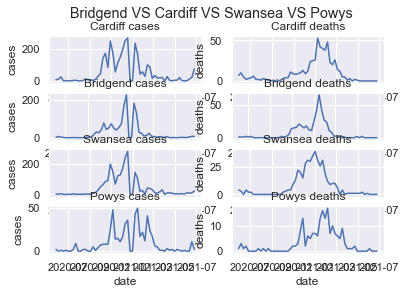

In [32]:
sns.set()
fig, axes = plt.subplots(4, 2)
fig.suptitle('Bridgend VS Cardiff VS Swansea VS Powys')



axes[0][0].set_title('Cardiff cases')
axes[0][1].set_title('Cardiff deaths')
axes[1][0].set_title('Bridgend cases')
axes[1][1].set_title('Bridgend deaths')
axes[2][0].set_title('Swansea cases')
axes[2][1].set_title('Swansea deaths')
axes[3][0].set_title('Powys cases')
axes[3][1].set_title('Powys deaths')

print(df['percentageSfp'].head)
print(df2['percentageSfp'].head)
print(df3['percentageSfp'].head)
print(df4['percentageSfp'].head)

sns.lineplot(ax=axes[0][0], x=df['date'],y=df['cases'])
sns.lineplot(ax=axes[0][1], x=df['date'],y=df['deaths'])
sns.lineplot(ax=axes[1][0], x=df2['date'],y=df2['cases'])
sns.lineplot(ax=axes[1][1], x=df2['date'],y=df2['deaths'])
sns.lineplot(ax=axes[2][0], x=df3['date'],y=df3['cases'])
sns.lineplot(ax=axes[2][1], x=df3['date'],y=df3['deaths'])
sns.lineplot(ax=axes[3][0], x=df4['date'],y=df4['cases'])
sns.lineplot(ax=axes[3][1], x=df4['date'],y=df4['deaths'])
#would be useful to scale the data





In [33]:
#we need to work out what percentage of total population per area were infected and what percentage per area died from covid

In [34]:
#df['percentOver65'] = ((df['tot'] / df['all'])*100)

df['casesSum'] = round(((df['cases'].sum() / df['population']*100)),2)
df['deathsSum'] = round(((df['deaths'].sum() / df['population'])*100),2)



<ipython-input-34-5aba978f8956>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casesSum'] = round(((df['cases'].sum() / df['population']*100)),2)
<ipython-input-34-5aba978f8956>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deathsSum'] = round(((df['deaths'].sum() / df['population'])*100),2)


In [35]:
df

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,casesSum,deathsSum
8676,W06000015,Cardiff,utla,2021-06-25,0,76.0,369202.0,52807.0,14.3,0.84,0.15
8687,W06000015,Cardiff,utla,2021-06-18,0,23.0,369202.0,52807.0,14.3,0.84,0.15
8698,W06000015,Cardiff,utla,2021-06-11,0,13.0,369202.0,52807.0,14.3,0.84,0.15
8709,W06000015,Cardiff,utla,2021-06-04,0,1.0,369202.0,52807.0,14.3,0.84,0.15
8720,W06000015,Cardiff,utla,2021-05-28,0,1.0,369202.0,52807.0,14.3,0.84,0.15
8731,W06000015,Cardiff,utla,2021-05-21,0,2.0,369202.0,52807.0,14.3,0.84,0.15
8742,W06000015,Cardiff,utla,2021-05-14,0,21.0,369202.0,52807.0,14.3,0.84,0.15
8753,W06000015,Cardiff,utla,2021-05-07,0,5.0,369202.0,52807.0,14.3,0.84,0.15
8764,W06000015,Cardiff,utla,2021-04-30,1,5.0,369202.0,52807.0,14.3,0.84,0.15
8775,W06000015,Cardiff,utla,2021-04-23,2,1.0,369202.0,52807.0,14.3,0.84,0.15


In [36]:
df2['casesSum'] = round(((df2['cases'].sum() / df2['population']*100)),2)
df2['deathsSum'] = round(((df2['deaths'].sum() / df2['population'])*100),2)

<ipython-input-36-71ac09218bc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['casesSum'] = round(((df2['cases'].sum() / df2['population']*100)),2)
<ipython-input-36-71ac09218bc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['deathsSum'] = round(((df2['deaths'].sum() / df2['population'])*100),2)


In [37]:
df2

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,casesSum,deathsSum
4451,W06000013,Bridgend,utla,2021-06-25,0,7.0,147539.0,30168.0,20.45,0.98,0.28
4465,W06000013,Bridgend,utla,2021-06-18,0,7.0,147539.0,30168.0,20.45,0.98,0.28
4479,W06000013,Bridgend,utla,2021-06-11,0,4.0,147539.0,30168.0,20.45,0.98,0.28
4493,W06000013,Bridgend,utla,2021-06-04,0,1.0,147539.0,30168.0,20.45,0.98,0.28
4507,W06000013,Bridgend,utla,2021-05-28,0,1.0,147539.0,30168.0,20.45,0.98,0.28
4521,W06000013,Bridgend,utla,2021-05-21,0,2.0,147539.0,30168.0,20.45,0.98,0.28
4535,W06000013,Bridgend,utla,2021-05-14,2,1.0,147539.0,30168.0,20.45,0.98,0.28
4549,W06000013,Bridgend,utla,2021-05-07,0,0.0,147539.0,30168.0,20.45,0.98,0.28
4563,W06000013,Bridgend,utla,2021-04-30,2,1.0,147539.0,30168.0,20.45,0.98,0.28
4577,W06000013,Bridgend,utla,2021-04-23,0,0.0,147539.0,30168.0,20.45,0.98,0.28


In [38]:
df0 = df5[df5['areaCode'].str.startswith("W")]
df0

df0['percentPopCases'] = round(((df0['cases'].sum() / df0['population']*100)),2)
df0['percentPopDeaths'] = round(((df0['deaths'].sum() / df0['population'])*100),2)
df0.reset_index()

<ipython-input-38-a30f05710a4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['percentPopCases'] = round(((df0['cases'].sum() / df0['population']*100)),2)
<ipython-input-38-a30f05710a4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['percentPopDeaths'] = round(((df0['deaths'].sum() / df0['population'])*100),2)


,index,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,percentPopCases,percentPopDeaths
0,11,W06000023,Powys,utla,2021-06-25,0,2.0,133030.0,36801.0,27.66,18.56,4.33
1,23,W06000023,Powys,utla,2021-06-18,0,11.0,133030.0,36801.0,27.66,18.56,4.33
2,35,W06000023,Powys,utla,2021-06-11,0,0.0,133030.0,36801.0,27.66,18.56,4.33
3,47,W06000023,Powys,utla,2021-06-04,1,0.0,133030.0,36801.0,27.66,18.56,4.33
4,59,W06000023,Powys,utla,2021-05-28,0,1.0,133030.0,36801.0,27.66,18.56,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,10789,W06000019,Blaenau Gwent,utla,2020-06-12,0,3.0,70020.0,14177.0,20.25,35.27,8.23
1242,10798,W06000004,Denbighshire,utla,2020-06-05,10,21.0,96664.0,23517.0,24.33,25.55,5.96
1243,10799,W06000018,Caerphilly,utla,2020-06-05,0,1.0,181731.0,35672.0,19.63,13.59,3.17
1244,10800,W06000019,Blaenau Gwent,utla,2020-06-05,2,0.0,70020.0,14177.0,20.25,35.27,8.23


In [39]:
df0 = df0.sort_values('percentageSfp')
df0.reset_index()

#normalise the number of cases and deaths between 0 and 1
df0['cases'] = (df0['cases']-df0['cases'].min())/(df0['cases'].max()-df0['cases'].min())
df0['deaths'] = (df0['deaths']-df0['deaths'].min())/(df0['deaths'].max()-df0['deaths'].min())


df0

df0['percentPopCases'] = round((df0['percentPopCases']/100),2)
df0['percentPopDeaths'] = round((df0['percentPopDeaths']/100),2)
df0['percentageSfp'] = round((df0['percentageSfp']/100),2)
df0

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,percentPopCases,percentPopDeaths
8742,W06000015,Cardiff,utla,2021-05-14,0.000000,0.070707,369202.0,52807.0,0.14,0.07,0.02
9050,W06000015,Cardiff,utla,2020-10-30,0.136364,0.848485,369202.0,52807.0,0.14,0.07,0.02
8676,W06000015,Cardiff,utla,2021-06-25,0.000000,0.255892,369202.0,52807.0,0.14,0.07,0.02
9039,W06000015,Cardiff,utla,2020-11-06,0.121212,0.599327,369202.0,52807.0,0.14,0.07,0.02
8775,W06000015,Cardiff,utla,2021-04-23,0.030303,0.003367,369202.0,52807.0,0.14,0.07,0.02
...,...,...,...,...,...,...,...,...,...,...,...
7472,W06000003,Conwy,utla,2020-11-20,0.015152,0.043771,118184.0,32938.0,0.28,0.21,0.05
7460,W06000003,Conwy,utla,2020-11-27,0.015152,0.010101,118184.0,32938.0,0.28,0.21,0.05
7448,W06000003,Conwy,utla,2020-12-04,0.015152,0.016835,118184.0,32938.0,0.28,0.21,0.05
7760,W06000003,Conwy,utla,2020-06-05,0.136364,0.026936,118184.0,32938.0,0.28,0.21,0.05


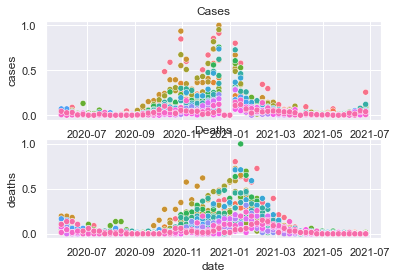

In [40]:

fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

#p = sns.regplot(ax=axes[0], x=df0['percentageSfp'],y=df0['casesSum'], data=df0)
#q = sns.regplot(ax=axes[1], x=df0['percentageSfp'],y=df0['deathsSum'], data=df0)




q = sns.scatterplot(ax=axes[0], x=df0['date'],y=df0['cases'], data=df0, hue=df0['areaCode'])
w = sns.scatterplot(ax=axes[1], x=df0['date'],y=df0['deaths'], data=df0, hue=df0['areaCode'])
q.legend_.remove()
w.legend_.remove()

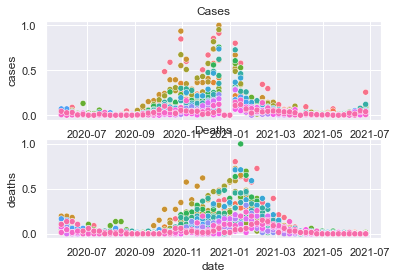

In [41]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

q = sns.scatterplot(ax=axes[0], x=df0['date'],y=df0['cases'], data=df0, hue=df0['areaCode'])
w = sns.scatterplot(ax=axes[1], x=df0['date'],y=df0['deaths'], data=df0, hue=df0['areaCode'])
q.legend_.remove()
w.legend_.remove()

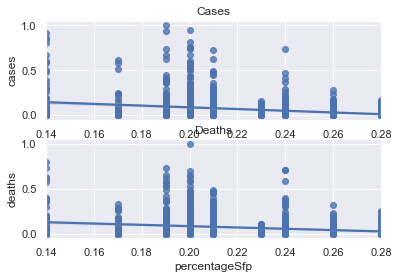

In [42]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

#q = sns.scatterplot(ax=axes[0], x=df0['percentageSfp'],y=df0['percentPopCases'], data=df0, hue=df0['areaCode'])
#w = sns.scatterplot(ax=axes[1], x=df0['percentageSfp'],y=df0['percentPopDeaths'], data=df0, hue=df0['areaCode'])
q = sns.regplot(ax=axes[0], x=df0['percentageSfp'],y=df0['cases'], data=df0)
w = sns.regplot(ax=axes[1], x=df0['percentageSfp'],y=df0['deaths'], data=df0)

#wat about recently? the general trend shows correlation but after covid jabs the trend should reverse



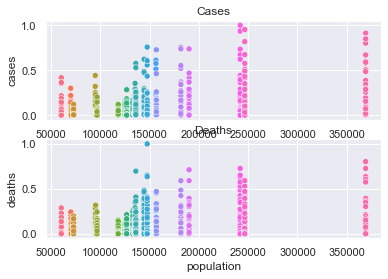

In [43]:
fig, axes = plt.subplots(2, 1)
df0 = df0.sort_values('population')
axes[0].set_title('Cases')
axes[1].set_title('Deaths')

q = sns.scatterplot(ax=axes[0], x=df0['population'],y=df0['cases'], data=df0, hue=df0['areaName'])
w = sns.scatterplot(ax=axes[1], x=df0['population'],y=df0['deaths'], data=df0, hue=df0['areaName'])
q.legend_.remove()
w.legend_.remove()

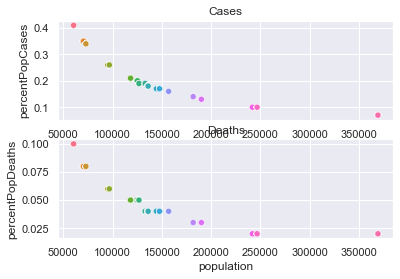

In [44]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

q = sns.scatterplot(ax=axes[0], x=df0['population'],y=df0['percentPopCases'], data=df0, hue=df0['areaCode'])
w = sns.scatterplot(ax=axes[1], x=df0['population'],y=df0['percentPopDeaths'], data=df0, hue=df0['areaCode'])
q.legend_.remove()
w.legend_.remove()



In [45]:
dfRecent = df0[df0['date']>"2021-05-11"]

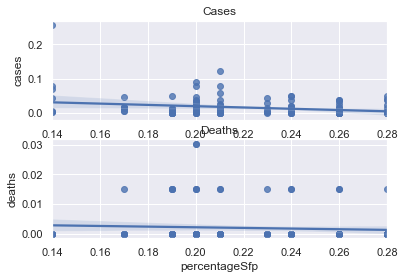

In [46]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

#q = sns.scatterplot(ax=axes[0], x=df0['percentageSfp'],y=df0['percentPopCases'], data=df0, hue=df0['areaCode'])
#w = sns.scatterplot(ax=axes[1], x=df0['percentageSfp'],y=df0['percentPopDeaths'], data=df0, hue=df0['areaCode'])
q = sns.regplot(ax=axes[0], x=dfRecent['percentageSfp'],y=dfRecent['cases'], data=dfRecent)
w = sns.regplot(ax=axes[1], x=dfRecent['percentageSfp'],y=dfRecent['deaths'], data=dfRecent)

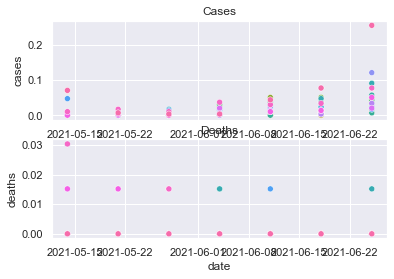

In [47]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

q = sns.scatterplot(ax=axes[0], x=dfRecent['date'],y=dfRecent['cases'], data=dfRecent, hue=dfRecent['areaCode'])
w = sns.scatterplot(ax=axes[1], x=dfRecent['date'],y=dfRecent['deaths'], data=dfRecent, hue=dfRecent['areaCode'])
q.legend_.remove()
w.legend_.remove()

In [48]:
dfNow = df0[df0['date']>"2021-04-03"]

In [49]:
dfNow

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,percentPopCases,percentPopDeaths
1534,W06000024,Merthyr Tydfil,utla,2021-06-25,0.0,0.010101,60424.0,11394.0,0.19,0.41,0.10
1633,W06000024,Merthyr Tydfil,utla,2021-04-23,0.0,0.000000,60424.0,11394.0,0.19,0.41,0.10
1655,W06000024,Merthyr Tydfil,utla,2021-04-09,0.0,0.000000,60424.0,11394.0,0.19,0.41,0.10
1567,W06000024,Merthyr Tydfil,utla,2021-06-04,0.0,0.000000,60424.0,11394.0,0.19,0.41,0.10
1545,W06000024,Merthyr Tydfil,utla,2021-06-18,0.0,0.000000,60424.0,11394.0,0.19,0.41,0.10
...,...,...,...,...,...,...,...,...,...,...,...
8731,W06000015,Cardiff,utla,2021-05-21,0.0,0.006734,369202.0,52807.0,0.14,0.07,0.02
8753,W06000015,Cardiff,utla,2021-05-07,0.0,0.016835,369202.0,52807.0,0.14,0.07,0.02
8720,W06000015,Cardiff,utla,2021-05-28,0.0,0.003367,369202.0,52807.0,0.14,0.07,0.02
8687,W06000015,Cardiff,utla,2021-06-18,0.0,0.077441,369202.0,52807.0,0.14,0.07,0.02


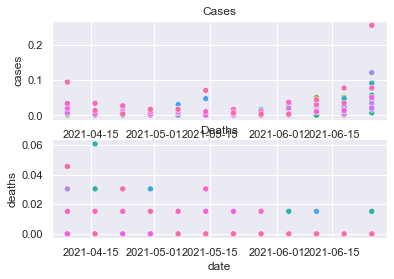

In [50]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

#q = sns.scatterplot(ax=axes[0], x=df0['percentageSfp'],y=df0['percentPopCases'], data=df0, hue=df0['areaCode'])
#w = sns.scatterplot(ax=axes[1], x=df0['percentageSfp'],y=df0['percentPopDeaths'], data=df0, hue=df0['areaCode'])
q = sns.scatterplot(ax=axes[0], x=dfNow['date'],y=dfNow['cases'], data=dfNow, hue='areaCode')
w = sns.scatterplot(ax=axes[1], x=dfNow['date'],y=dfNow['deaths'], data=dfNow, hue='areaCode')
q.legend_.remove()
w.legend_.remove()

In [51]:


df = df0.groupby(['areaCode'])

df.head()

,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,percentPopCases,percentPopDeaths
1534,W06000024,Merthyr Tydfil,utla,2021-06-25,0.000000,0.010101,60424.0,11394.0,0.19,0.41,0.10
2150,W06000024,Merthyr Tydfil,utla,2020-05-29,0.015152,0.010101,60424.0,11394.0,0.19,0.41,0.10
1919,W06000024,Merthyr Tydfil,utla,2020-10-23,0.030303,0.127946,60424.0,11394.0,0.19,0.41,0.10
1633,W06000024,Merthyr Tydfil,utla,2021-04-23,0.000000,0.000000,60424.0,11394.0,0.19,0.41,0.10
1908,W06000024,Merthyr Tydfil,utla,2020-10-30,0.075758,0.353535,60424.0,11394.0,0.19,0.41,0.10
...,...,...,...,...,...,...,...,...,...,...,...
8841,W06000015,Cardiff,utla,2021-03-12,0.181818,0.063973,369202.0,52807.0,0.14,0.07,0.02
8962,W06000015,Cardiff,utla,2020-12-25,0.378788,0.000000,369202.0,52807.0,0.14,0.07,0.02
8830,W06000015,Cardiff,utla,2021-03-19,0.075758,0.067340,369202.0,52807.0,0.14,0.07,0.02
8951,W06000015,Cardiff,utla,2021-01-01,0.393939,0.000000,369202.0,52807.0,0.14,0.07,0.02


In [52]:
demo = demo[demo['areaCode'].str.startswith("W")]

In [53]:
am = df0.merge(demo, on=['areaCode'])

In [54]:
x = demo[demo['areaCode'] == 'W06000015']
(x['0']/x['all']) 


367    0.010284
dtype: float64

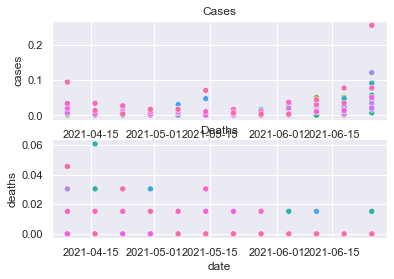

In [55]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

#q = sns.scatterplot(ax=axes[0], x=df0['percentageSfp'],y=df0['percentPopCases'], data=df0, hue=df0['areaCode'])
#w = sns.scatterplot(ax=axes[1], x=df0['percentageSfp'],y=df0['percentPopDeaths'], data=df0, hue=df0['areaCode'])
q = sns.scatterplot(ax=axes[0], x=dfNow['date'],y=dfNow['cases'], data=dfNow, hue='areaCode')
w = sns.scatterplot(ax=axes[1], x=dfNow['date'],y=dfNow['deaths'], data=dfNow, hue='areaCode')
q.legend_.remove()
w.legend_.remove()

In [56]:
demo

,areaCode,name,geography,all,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
352,W92000004,WALES,Country,3169586,29401,30837,32660,33568,34875,35017,...,19640,18385,16646,15324,13684,12208,10894,9429,8185,30760
353,W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,...,585,540,455,404,373,306,290,260,218,956
354,W06000002,Gwynedd,Unitary Authority,125171,1038,1068,1188,1150,1247,1185,...,848,755,748,626,611,586,521,455,440,1563
355,W06000003,Conwy,Unitary Authority,118184,978,984,1064,1093,1113,1181,...,1004,912,855,824,740,698,631,528,459,2116
356,W06000004,Denbighshire,Unitary Authority,96664,937,953,976,1028,1026,1061,...,657,658,637,531,458,396,384,328,277,827
357,W06000005,Flintshire,Unitary Authority,156847,1419,1508,1621,1705,1714,1675,...,1012,916,840,682,628,526,452,463,341,1303
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,778,714,667,626,524,469,449,397,362,1229
359,W06000023,Powys,Unitary Authority,133030,1048,1122,1235,1198,1231,1282,...,1092,998,893,856,716,660,590,517,490,1774
360,W06000008,Ceredigion,Unitary Authority,72895,501,539,606,592,639,715,...,495,475,449,399,418,338,312,299,239,1029
361,W06000009,Pembrokeshire,Unitary Authority,126751,1037,1066,1159,1215,1242,1313,...,944,919,767,789,712,580,588,473,418,1636


In [57]:
demo
x = range(0,90)
y = demo

In [58]:
demo

,areaCode,name,geography,all,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
352,W92000004,WALES,Country,3169586,29401,30837,32660,33568,34875,35017,...,19640,18385,16646,15324,13684,12208,10894,9429,8185,30760
353,W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,...,585,540,455,404,373,306,290,260,218,956
354,W06000002,Gwynedd,Unitary Authority,125171,1038,1068,1188,1150,1247,1185,...,848,755,748,626,611,586,521,455,440,1563
355,W06000003,Conwy,Unitary Authority,118184,978,984,1064,1093,1113,1181,...,1004,912,855,824,740,698,631,528,459,2116
356,W06000004,Denbighshire,Unitary Authority,96664,937,953,976,1028,1026,1061,...,657,658,637,531,458,396,384,328,277,827
357,W06000005,Flintshire,Unitary Authority,156847,1419,1508,1621,1705,1714,1675,...,1012,916,840,682,628,526,452,463,341,1303
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,778,714,667,626,524,469,449,397,362,1229
359,W06000023,Powys,Unitary Authority,133030,1048,1122,1235,1198,1231,1282,...,1092,998,893,856,716,660,590,517,490,1774
360,W06000008,Ceredigion,Unitary Authority,72895,501,539,606,592,639,715,...,495,475,449,399,418,338,312,299,239,1029
361,W06000009,Pembrokeshire,Unitary Authority,126751,1037,1066,1159,1215,1242,1313,...,944,919,767,789,712,580,588,473,418,1636


In [59]:
wales = demo[demo['name']=='WALES']



wales

,areaCode,name,geography,all,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
352,W92000004,WALES,Country,3169586,29401,30837,32660,33568,34875,35017,...,19640,18385,16646,15324,13684,12208,10894,9429,8185,30760


<AxesSubplot:xlabel='areaCode'>

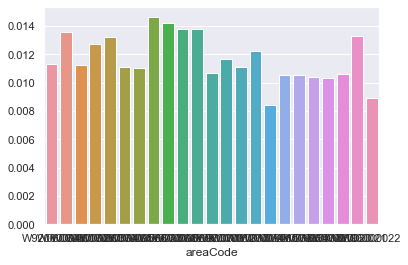

In [60]:
sns.barplot(data=demo, x="areaCode", y=(demo["65"] / demo["all"]))
#plt.bar(range(0,91),nmbrs)

In [61]:
df = df0
df = df.merge(demo,how="left", on="areaCode")


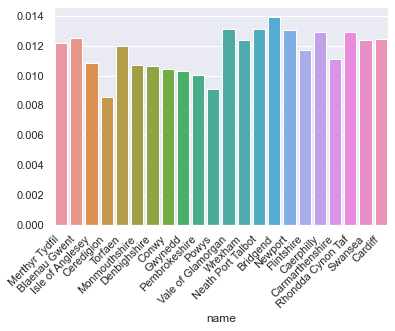

In [62]:

chart = sns.barplot(data=df, x="name", y=(df['40'] / df['all']))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

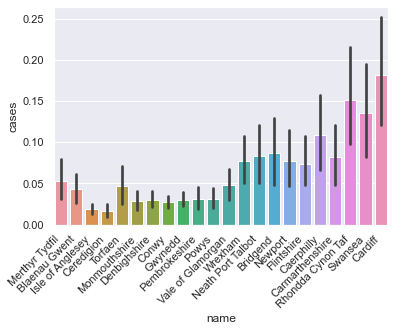

In [63]:
chart = sns.barplot(data=df, x="name", y="cases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<ipython-input-64-13c425cf016e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


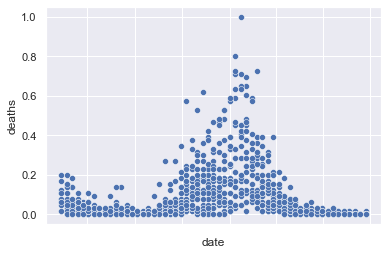

In [64]:
chart = sns.scatterplot(data=df, x="date", y="deaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [65]:
#add up all the over 65s
Over65Demo = demo['65']+demo['66']+demo['67']+demo['68']+demo['69']+demo['70']+demo['71']+demo['72']+demo['73']+demo['74']+demo['75']+demo['76']+demo['77']+demo['78']+demo['79']+demo['80']+demo['81']+demo['82']+demo['83']+demo['84']+demo['85']+demo['86']+demo['87']+demo['88']+demo['89']+demo['90+']

demo['Over65Demo'] = Over65Demo
demo['percentOver65'] = round(((demo['Over65Demo']/demo['all'])*100),2)
demo

<ipython-input-65-9000b975e50b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['Over65Demo'] = Over65Demo
<ipython-input-65-9000b975e50b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['percentOver65'] = round(((demo['Over65Demo']/demo['all'])*100),2)


,areaCode,name,geography,all,0,1,2,3,4,5,...,83,84,85,86,87,88,89,90+,Over65Demo,percentOver65
352,W92000004,WALES,Country,3169586,29401,30837,32660,33568,34875,35017,...,16646,15324,13684,12208,10894,9429,8185,30760,668590,21.09
353,W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,...,455,404,373,306,290,260,218,956,18639,26.46
354,W06000002,Gwynedd,Unitary Authority,125171,1038,1068,1188,1150,1247,1185,...,748,626,611,586,521,455,440,1563,28562,22.82
355,W06000003,Conwy,Unitary Authority,118184,978,984,1064,1093,1113,1181,...,855,824,740,698,631,528,459,2116,32938,27.87
356,W06000004,Denbighshire,Unitary Authority,96664,937,953,976,1028,1026,1061,...,637,531,458,396,384,328,277,827,23517,24.33
357,W06000005,Flintshire,Unitary Authority,156847,1419,1508,1621,1705,1714,1675,...,840,682,628,526,452,463,341,1303,33294,21.23
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,667,626,524,469,449,397,362,1229,27749,20.40
359,W06000023,Powys,Unitary Authority,133030,1048,1122,1235,1198,1231,1282,...,893,856,716,660,590,517,490,1774,36801,27.66
360,W06000008,Ceredigion,Unitary Authority,72895,501,539,606,592,639,715,...,449,399,418,338,312,299,239,1029,18668,25.61
361,W06000009,Pembrokeshire,Unitary Authority,126751,1037,1066,1159,1215,1242,1313,...,767,789,712,580,588,473,418,1636,33169,26.17


In [66]:

cI = covidInfections[covidInfections['areaCode'].str.startswith("W")]
i = cI.groupby(['areaCode']).sum()
type(i)
demo = demo.join(i, on='areaCode')




In [67]:
demo
df = demo.rename(columns = {'cases':'sumCases'})

In [68]:
df['percentCases'] = round(((df['sumCases']/df['all'])*100),2)


In [69]:
df[df['name']=='Newport']

,areaCode,name,geography,all,0,1,2,3,4,5,...,85,86,87,88,89,90+,Over65Demo,percentOver65,sumCases,percentCases
374,W06000022,Newport,Unitary Authority,156447,1908,2016,1954,2027,2100,2140,...,553,515,406,355,336,1133,26654,17.04,10904.0,6.97


In [70]:
dfSorted = df.sort_values(by='percentOver65')



In [71]:
dfSorted

,areaCode,name,geography,all,0,1,2,3,4,5,...,85,86,87,88,89,90+,Over65Demo,percentOver65,sumCases,percentCases
367,W06000015,Cardiff,Unitary Authority,369202,3797,3914,4037,4168,4501,4395,...,1140,1033,925,810,715,2820,52807,14.30,25675.0,6.95
374,W06000022,Newport,Unitary Authority,156447,1908,2016,1954,2027,2100,2140,...,553,515,406,355,336,1133,26654,17.04,10904.0,6.97
369,W06000024,Merthyr Tydfil,Unitary Authority,60424,642,664,711,742,735,811,...,216,166,163,127,141,426,11394,18.86,6418.0,10.62
368,W06000016,Rhondda Cynon Taf,Unitary Authority,241873,2411,2557,2574,2676,2831,2793,...,910,856,713,526,488,1842,46755,19.33,20331.0,8.41
370,W06000018,Caerphilly,Unitary Authority,181731,1746,1800,1975,1987,2103,2090,...,699,680,497,431,392,1253,35672,19.63,13203.0,7.27
363,W06000011,Swansea,Unitary Authority,246563,2191,2277,2455,2447,2625,2580,...,1093,942,846,769,567,2394,48958,19.86,16990.0,6.89
371,W06000019,Blaenau Gwent,Unitary Authority,70020,711,733,753,680,762,748,...,268,204,241,165,139,560,14177,20.25,5962.0,8.51
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,524,469,449,397,362,1229,27749,20.40,11774.0,8.65
365,W06000013,Bridgend,Unitary Authority,147539,1342,1495,1537,1603,1659,1588,...,621,529,454,434,342,1114,30168,20.45,12426.0,8.42
372,W06000020,Torfaen,Unitary Authority,94832,913,1019,1010,1080,1083,1041,...,414,372,334,301,260,903,19543,20.61,6361.0,6.71


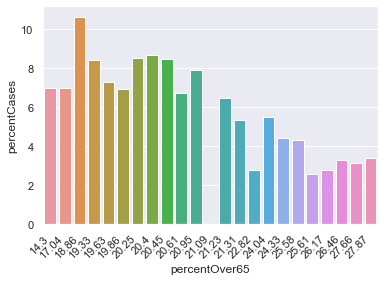

In [72]:
chart = sns.barplot(data=dfSorted, x="percentOver65", y="percentCases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


In [73]:
df

,areaCode,name,geography,all,0,1,2,3,4,5,...,85,86,87,88,89,90+,Over65Demo,percentOver65,sumCases,percentCases
352,W92000004,WALES,Country,3169586,29401,30837,32660,33568,34875,35017,...,13684,12208,10894,9429,8185,30760,668590,21.09,NaN,NaN
353,W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,...,373,306,290,260,218,956,18639,26.46,2313.0,3.28
354,W06000002,Gwynedd,Unitary Authority,125171,1038,1068,1188,1150,1247,1185,...,611,586,521,455,440,1563,28562,22.82,3427.0,2.74
355,W06000003,Conwy,Unitary Authority,118184,978,984,1064,1093,1113,1181,...,740,698,631,528,459,2116,32938,27.87,3974.0,3.36
356,W06000004,Denbighshire,Unitary Authority,96664,937,953,976,1028,1026,1061,...,458,396,384,328,277,827,23517,24.33,4251.0,4.40
357,W06000005,Flintshire,Unitary Authority,156847,1419,1508,1621,1705,1714,1675,...,628,526,452,463,341,1303,33294,21.23,10120.0,6.45
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,524,469,449,397,362,1229,27749,20.40,11774.0,8.65
359,W06000023,Powys,Unitary Authority,133030,1048,1122,1235,1198,1231,1282,...,716,660,590,517,490,1774,36801,27.66,4160.0,3.13
360,W06000008,Ceredigion,Unitary Authority,72895,501,539,606,592,639,715,...,418,338,312,299,239,1029,18668,25.61,1852.0,2.54
361,W06000009,Pembrokeshire,Unitary Authority,126751,1037,1066,1159,1215,1242,1313,...,712,580,588,473,418,1636,33169,26.17,3488.0,2.75


In [74]:
cD = pd.read_excel('C:\\Users\\David\\Downloads\\utlaDeath.xlsx')
i = cD.groupby(['areaCode']).sum()


df = df.join(i, on='areaCode')

In [75]:
df = df.rename(columns = {'newOnsDeathsByRegistrationDate':'sumDeaths'})

In [76]:
df['percentDeaths'] = round(((df['sumDeaths']/df['all'])*100),2)

In [77]:
dfSort = df.sort_values(by='percentOver65')

In [78]:
dfSort

,areaCode,name,geography,all,0,1,2,3,4,5,...,87,88,89,90+,Over65Demo,percentOver65,sumCases,percentCases,sumDeaths,percentDeaths
367,W06000015,Cardiff,Unitary Authority,369202,3797,3914,4037,4168,4501,4395,...,925,810,715,2820,52807,14.30,25675.0,6.95,888.0,0.24
374,W06000022,Newport,Unitary Authority,156447,1908,2016,1954,2027,2100,2140,...,406,355,336,1133,26654,17.04,10904.0,6.97,388.0,0.25
369,W06000024,Merthyr Tydfil,Unitary Authority,60424,642,664,711,742,735,811,...,163,127,141,426,11394,18.86,6418.0,10.62,211.0,0.35
368,W06000016,Rhondda Cynon Taf,Unitary Authority,241873,2411,2557,2574,2676,2831,2793,...,713,526,488,1842,46755,19.33,20331.0,8.41,883.0,0.37
370,W06000018,Caerphilly,Unitary Authority,181731,1746,1800,1975,1987,2103,2090,...,497,431,392,1253,35672,19.63,13203.0,7.27,472.0,0.26
363,W06000011,Swansea,Unitary Authority,246563,2191,2277,2455,2447,2625,2580,...,846,769,567,2394,48958,19.86,16990.0,6.89,625.0,0.25
371,W06000019,Blaenau Gwent,Unitary Authority,70020,711,733,753,680,762,748,...,241,165,139,560,14177,20.25,5962.0,8.51,215.0,0.31
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,449,397,362,1229,27749,20.40,11774.0,8.65,380.0,0.28
365,W06000013,Bridgend,Unitary Authority,147539,1342,1495,1537,1603,1659,1588,...,454,434,342,1114,30168,20.45,12426.0,8.42,504.0,0.34
372,W06000020,Torfaen,Unitary Authority,94832,913,1019,1010,1080,1083,1041,...,334,301,260,903,19543,20.61,6361.0,6.71,260.0,0.27


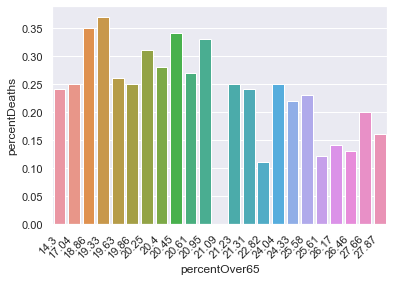

In [79]:
chart = sns.barplot(data=dfSort, x="percentOver65", y="percentDeaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


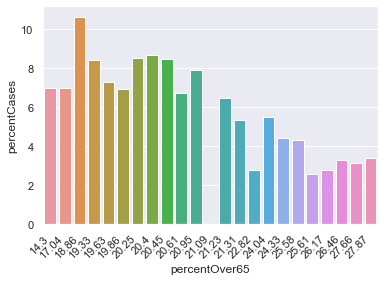

In [80]:
chart = sns.barplot(data=dfSort, x="percentOver65", y="percentCases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

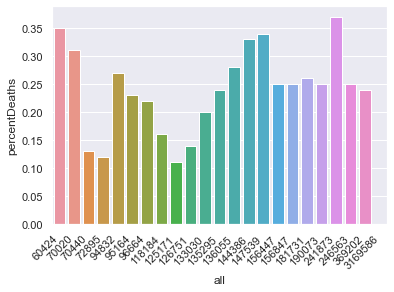

In [81]:
chart = sns.barplot(data=dfSort, x="all", y="percentDeaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

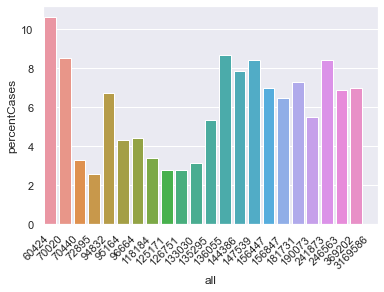

In [82]:
chart = sns.barplot(data=dfSort, x="all", y="percentCases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [83]:
df

,areaCode,name,geography,all,0,1,2,3,4,5,...,87,88,89,90+,Over65Demo,percentOver65,sumCases,percentCases,sumDeaths,percentDeaths
352,W92000004,WALES,Country,3169586,29401,30837,32660,33568,34875,35017,...,10894,9429,8185,30760,668590,21.09,NaN,NaN,NaN,NaN
353,W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,...,290,260,218,956,18639,26.46,2313.0,3.28,92.0,0.13
354,W06000002,Gwynedd,Unitary Authority,125171,1038,1068,1188,1150,1247,1185,...,521,455,440,1563,28562,22.82,3427.0,2.74,132.0,0.11
355,W06000003,Conwy,Unitary Authority,118184,978,984,1064,1093,1113,1181,...,631,528,459,2116,32938,27.87,3974.0,3.36,187.0,0.16
356,W06000004,Denbighshire,Unitary Authority,96664,937,953,976,1028,1026,1061,...,384,328,277,827,23517,24.33,4251.0,4.40,215.0,0.22
357,W06000005,Flintshire,Unitary Authority,156847,1419,1508,1621,1705,1714,1675,...,452,463,341,1303,33294,21.23,10120.0,6.45,391.0,0.25
358,W06000006,Wrexham,Unitary Authority,136055,1381,1371,1484,1572,1513,1608,...,449,397,362,1229,27749,20.40,11774.0,8.65,380.0,0.28
359,W06000023,Powys,Unitary Authority,133030,1048,1122,1235,1198,1231,1282,...,590,517,490,1774,36801,27.66,4160.0,3.13,269.0,0.20
360,W06000008,Ceredigion,Unitary Authority,72895,501,539,606,592,639,715,...,312,299,239,1029,18668,25.61,1852.0,2.54,91.0,0.12
361,W06000009,Pembrokeshire,Unitary Authority,126751,1037,1066,1159,1215,1242,1313,...,588,473,418,1636,33169,26.17,3488.0,2.75,176.0,0.14


In [84]:


df = df.set_index('areaCode').join(df0.set_index('areaCode'))

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, W06000001 to W92000004
Columns: 110 entries, name to percentPopDeaths
dtypes: datetime64[ns](1), float64(12), int64(93), object(4)
memory usage: 1.1+ MB


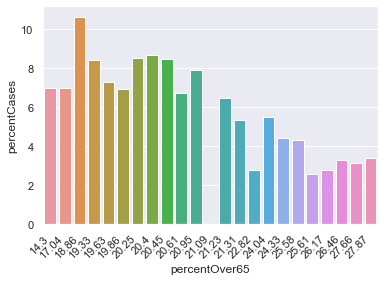

In [86]:
chart = sns.barplot(data=df, x="percentOver65", y="percentCases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [87]:
df

,name,geography,all,0,1,2,3,4,5,6,...,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,percentPopCases,percentPopDeaths
areaCode,,,,,,,,,,,,,,,,,,,,,
W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,787,...,Isle of Anglesey,utla,2021-05-21,0.015152,0.003367,70440.0,18639.0,0.26,0.35,0.08
W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,787,...,Isle of Anglesey,utla,2020-10-16,0.000000,0.006734,70440.0,18639.0,0.26,0.35,0.08
W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,787,...,Isle of Anglesey,utla,2021-02-26,0.075758,0.010101,70440.0,18639.0,0.26,0.35,0.08
W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,787,...,Isle of Anglesey,utla,2020-07-24,0.000000,0.000000,70440.0,18639.0,0.26,0.35,0.08
W06000001,Isle of Anglesey,Unitary Authority,70440,576,593,686,719,749,705,787,...,Isle of Anglesey,utla,2020-10-02,0.000000,0.000000,70440.0,18639.0,0.26,0.35,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W06000024,Merthyr Tydfil,Unitary Authority,60424,642,664,711,742,735,811,711,...,Merthyr Tydfil,utla,2020-09-18,0.015152,0.037037,60424.0,11394.0,0.19,0.41,0.10
W06000024,Merthyr Tydfil,Unitary Authority,60424,642,664,711,742,735,811,711,...,Merthyr Tydfil,utla,2020-11-06,0.136364,0.144781,60424.0,11394.0,0.19,0.41,0.10
W06000024,Merthyr Tydfil,Unitary Authority,60424,642,664,711,742,735,811,711,...,Merthyr Tydfil,utla,2021-05-28,0.015152,0.000000,60424.0,11394.0,0.19,0.41,0.10


In [88]:
df2


,areaCode,areaName,areaType,date,deaths,cases,population,sfp,percentageSfp,casesSum,deathsSum
4451,W06000013,Bridgend,utla,2021-06-25,0,7.0,147539.0,30168.0,20.45,0.98,0.28
4465,W06000013,Bridgend,utla,2021-06-18,0,7.0,147539.0,30168.0,20.45,0.98,0.28
4479,W06000013,Bridgend,utla,2021-06-11,0,4.0,147539.0,30168.0,20.45,0.98,0.28
4493,W06000013,Bridgend,utla,2021-06-04,0,1.0,147539.0,30168.0,20.45,0.98,0.28
4507,W06000013,Bridgend,utla,2021-05-28,0,1.0,147539.0,30168.0,20.45,0.98,0.28
4521,W06000013,Bridgend,utla,2021-05-21,0,2.0,147539.0,30168.0,20.45,0.98,0.28
4535,W06000013,Bridgend,utla,2021-05-14,2,1.0,147539.0,30168.0,20.45,0.98,0.28
4549,W06000013,Bridgend,utla,2021-05-07,0,0.0,147539.0,30168.0,20.45,0.98,0.28
4563,W06000013,Bridgend,utla,2021-04-30,2,1.0,147539.0,30168.0,20.45,0.98,0.28
4577,W06000013,Bridgend,utla,2021-04-23,0,0.0,147539.0,30168.0,20.45,0.98,0.28


# TIME TO WORK WITH THE WHOLE DATASET

In [89]:
#merge infections and deaths of whole dataset

df = covidDeaths.merge(covidInfections, on=["areaCode","date"])

df = df.drop(['areaName_y', 'areaType_y'], axis=1)

df = df.rename(columns = {'areaName_x':'areaName','areaType_x':'areaType', 'newOnsDeathsByRegistrationDate':'deaths'})

dfNow = df[df['date']>"2021-04-03"]

dfNow


,areaCode,areaName,areaType,date,deaths,cases
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37
1,E06000014,York,utla,2021-06-25,0,84
2,E06000050,Cheshire West and Chester,utla,2021-06-25,1,85
3,E08000001,Bolton,utla,2021-06-25,7,118
4,E08000016,Barnsley,utla,2021-06-25,0,78
...,...,...,...,...,...,...
10308,E06000036,Bracknell Forest,utla,2021-04-09,1,0
10309,E06000037,West Berkshire,utla,2021-04-09,0,0
10310,E08000035,Leeds,utla,2021-04-09,10,22
10311,E09000017,Hillingdon,utla,2021-04-09,3,0


In [90]:
#now we have all the data for cases and deaths split by region. Lets add demographic data


In [91]:
demo = pd.read_excel('C:\\Users\\David\\Downloads\\demo.xlsx')
demo = demo.rename(columns = {"Code":"areaCode", "All ages":"all", "Geography":"geography", "Name":"name"})

In [92]:
#now lets merge demographic data to the existing covid data on areaCode

df = df.merge(demo, on=["areaCode"])

In [93]:
#df.info()
df

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,0,...,81,82,83,84,85,86,87,88,89,90+
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37,Redcar and Cleveland,Unitary Authority,137228,1286,...,1002,897,852,720,650,542,482,430,368,1365
1,E06000003,Redcar and Cleveland,utla,2021-06-18,0,12,Redcar and Cleveland,Unitary Authority,137228,1286,...,1002,897,852,720,650,542,482,430,368,1365
2,E06000003,Redcar and Cleveland,utla,2021-06-11,0,6,Redcar and Cleveland,Unitary Authority,137228,1286,...,1002,897,852,720,650,542,482,430,368,1365
3,E06000003,Redcar and Cleveland,utla,2021-06-04,0,6,Redcar and Cleveland,Unitary Authority,137228,1286,...,1002,897,852,720,650,542,482,430,368,1365
4,E06000003,Redcar and Cleveland,utla,2021-05-28,0,1,Redcar and Cleveland,Unitary Authority,137228,1286,...,1002,897,852,720,650,542,482,430,368,1365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,E10000012,Essex,utla,2020-05-15,95,12,Essex,County,1497759,15708,...,9430,8733,8102,7443,6709,5953,5227,4745,4162,15314
10489,E10000012,Essex,utla,2020-05-08,107,35,Essex,County,1497759,15708,...,9430,8733,8102,7443,6709,5953,5227,4745,4162,15314
10490,E10000012,Essex,utla,2020-05-01,162,34,Essex,County,1497759,15708,...,9430,8733,8102,7443,6709,5953,5227,4745,4162,15314
10491,E10000012,Essex,utla,2020-04-24,252,50,Essex,County,1497759,15708,...,9430,8733,8102,7443,6709,5953,5227,4745,4162,15314


In [94]:
#lets see what percentage of each area is aged 65 or over

#for each row: divide number of 65+ by the total population of that area to get the area-specific total percentage of the population aged 65 or over
    
    
df['percent65OrOver'] = None


for i in df.index:
    a = df.loc[i,'65']+df.loc[i,'66']+df.loc[i,'67']+df.loc[i,'68']+df.loc[i,'69']+df.loc[i,'70']+df.loc[i,'71']+df.loc[i,'72']+df.loc[i,'74']+df.loc[i,'75']+df.loc[i,'76']+df.loc[i,'77']+df.loc[i,'78']+df.loc[i,'79']+df.loc[i,'80']+df.loc[i,'81']+df.loc[i,'82']+df.loc[i,'83']+df.loc[i,'84']+df.loc[i,'85']+df.loc[i,'86']+df.loc[i,'87']+df.loc[i,'88']+df.loc[i,'89']+df.loc[i,'90+']
    b = round(a / df.loc[i,'all'],2)
    df.loc[i,'percent65OrOver'] = b
   





In [95]:
#now that we have the percent of 65+ residents for each area, lets get the sum of all the cases and deaths for each area

i = df.groupby(['areaCode']).cases.sum()
h = df.groupby(['areaCode']).deaths.sum()
df = df.merge(i,on="areaCode")
df = df.merge(h,on="areaCode")



In [96]:
#clean up the columns

df = df.rename(columns={"cases_y":"sumCases","cases_x":"cases", "deaths_x":"deaths","deaths_y":"sumDeaths"})


In [97]:
#lets add a column to show the percent of sumCases and sumDeaths as a percentage of total population

df['percentCases'] = None
df['percentDeaths'] = None

for i in df.index:
    a = df.loc[i,'sumCases']/df.loc[i,'all']
    b = df.loc[i,'sumDeaths']/df.loc[i,'all']
   
    df.loc[i,'percentCases'] = a
    df.loc[i,'percentDeaths'] = b

In [98]:
#lets split the data by time

#8 Dec 2020 - uk vac programme started 
dfDec = df[df['date']>"2020-12-08"]
dfDec = dfDec[dfDec['date']<"2021-02-14"]

#14 Feb 2021 - all 15 million people in top 4 priority groups have 1st dose
dfFeb = df[df['date']>"2021-02-14"]
dfFeb = dfFeb[dfFeb['date']<"2021-04-15"]

#15 April - 32 million first doses administered
dfApril = df[df['date']>"2021-04-15"]
dfApril = dfApril[dfApril['date']<"2021-07-05"]
#5 July 2021 45 million first doses administered


In [99]:


#now lets separate by region and time


#lets split the data by time

#8 Dec 2020 - uk vac programme started 
dfDec = df[df['date']>"2020-12-08"]
dfDec = dfDec[dfDec['date']<"2021-02-14"]

#14 Feb 2021 - all 15 million people in top 4 priority groups have 1st dose
dfFeb = df[df['date']>"2021-02-14"]
dfFeb = dfFeb[dfFeb['date']<"2021-04-15"]

#15 April - 32 million first doses administered
dfApril = df[df['date']>"2021-04-15"]
dfApril = dfApril[dfApril['date']<"2021-07-05"]
#5 July 2021 45 million first doses administered


#Wales

dfWales = df[df['areaCode'].str.startswith("W")]

#lets split the data by time

#8 Dec 2020 - uk vac programme started 
dfWalesDec = dfWales[dfWales['date']>"2020-12-08"]
dfWalesDec = dfWalesDec[dfWalesDec['date']<"2021-02-14"]

#14 Feb 2021 - all 15 million people in top 4 priority groups have 1st dose
dfWalesFeb = dfWales[dfWales['date']>"2021-02-14"]
dfWalesFeb = dfWalesFeb[dfWalesFeb['date']<"2021-04-15"]

#15 April - 32 million first doses administered
dfWalesApril = dfWales[dfWales['date']>"2021-04-15"]
dfWalesApril = dfWalesApril[dfWalesApril['date']<"2021-07-05"]
#5 July 2021 45 million first doses administered

#England

dfEngland = df[df['areaCode'].str.startswith("E")]

#lets split the data by time

#8 Dec 2020 - uk vac programme started 
dfEnglandDec = dfEngland[dfEngland['date']>"2020-12-08"]
dfEnglandDec = dfEnglandDec[dfEnglandDec['date']<"2021-02-14"]

#14 Feb 2021 - all 15 million people in top 4 priority groups have 1st dose
dfEnglandFeb = dfEngland[dfEngland['date']>"2021-02-14"]
dfEnglandFeb = dfEnglandFeb[dfEnglandFeb['date']<"2021-04-15"]

#15 April - 32 million first doses administered
dfEnglandApril = dfEngland[dfEngland['date']>"2021-04-15"]
dfEnglandApril = dfEnglandApril[dfEnglandApril['date']<"2021-07-05"]
#5 July 2021 45 million first doses administered

#check data all accounted for
x = len(df)
y = len(dfWales)
z = len(dfEngland)
print(x, (y+z))






10493 10493


# LETS START TO VISUALISE

## Cases and deaths over time

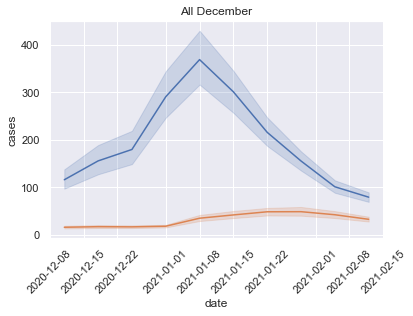

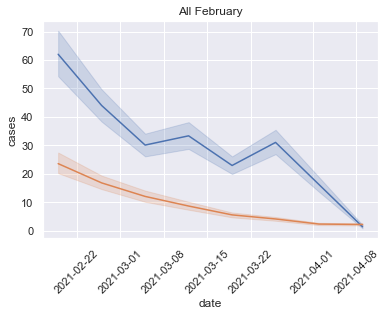

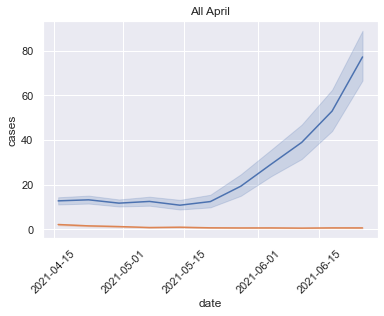

In [100]:


sns.lineplot(data=dfDec, x="date", y="cases")
sns.lineplot(data=dfDec, x="date", y="deaths")
plt.title('All December')
plt.xticks (rotation=45) 
plt.show()

sns.lineplot(data=dfFeb, x="date", y="cases")
sns.lineplot(data=dfFeb, x="date", y="deaths")
plt.title('All February')
plt.xticks (rotation=45)
plt.show()


sns.lineplot(data=dfApril, x="date", y="cases")
sns.lineplot(data=dfApril, x="date", y="deaths")
plt.xticks (rotation=45)
plt.title('All April')
plt.show()



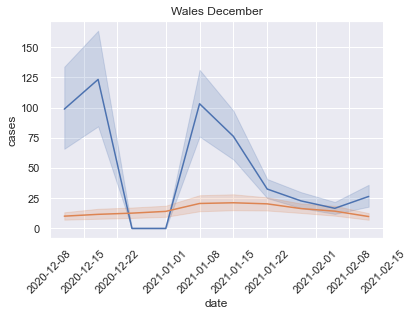

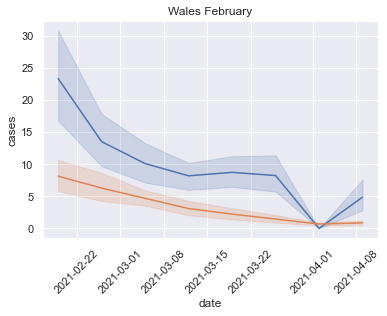

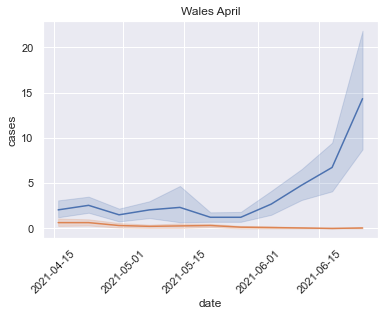

In [101]:

sns.lineplot(data=dfWalesDec, x="date", y="cases")
sns.lineplot(data=dfWalesDec, x="date", y="deaths")
plt.title('Wales December')
plt.xticks (rotation=45)
plt.show()

sns.lineplot(data=dfWalesFeb, x="date", y="cases")
sns.lineplot(data=dfWalesFeb, x="date", y="deaths")
plt.xticks (rotation=45)
plt.title('Wales February')
plt.show()

sns.lineplot(data=dfWalesApril, x="date", y="cases")
sns.lineplot(data=dfWalesApril, x="date", y="deaths")
plt.xticks (rotation=45)
plt.title('Wales April')
plt.show()


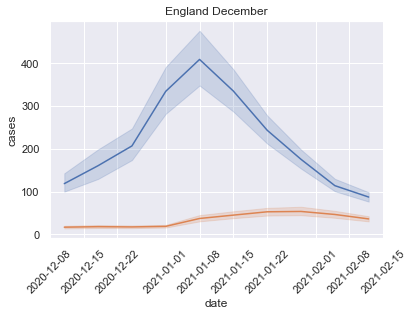

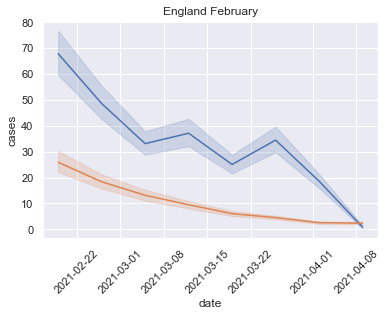

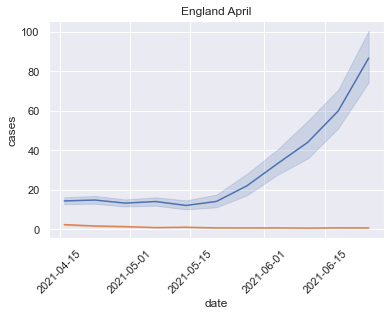

In [102]:
sns.lineplot(data=dfEnglandDec, x="date", y="cases")
sns.lineplot(data=dfEnglandDec, x="date", y="deaths")
plt.xticks (rotation=45)
plt.title('England December')
plt.show()

sns.lineplot(data=dfEnglandFeb, x="date", y="cases")
sns.lineplot(data=dfEnglandFeb, x="date", y="deaths")
plt.xticks (rotation=45)
plt.title('England February')
plt.show()

sns.lineplot(data=dfEnglandApril, x="date", y="cases")
sns.lineplot(data=dfEnglandApril, x="date", y="deaths")
plt.xticks (rotation=45)
plt.title('England April')
plt.show()

#these with ages?

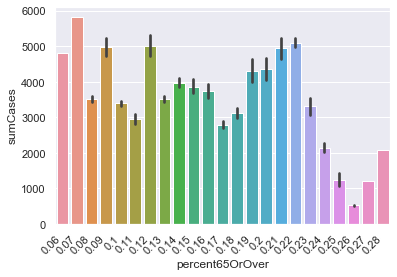

In [103]:
chart = sns.barplot(data=df, x="percent65OrOver", y="sumCases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#the below shows that there is a negative correlation in number of total cases as the percentage of the population 65+ increases

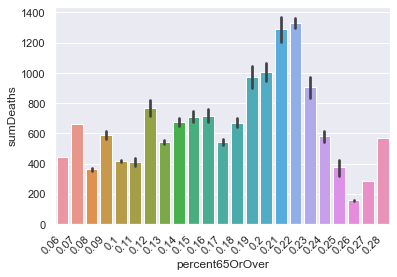

In [104]:
chart = sns.barplot(data=df, x="percent65OrOver", y="sumDeaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#t shows that there is an increase in number of deaths as the percentage of the population 65+ increases

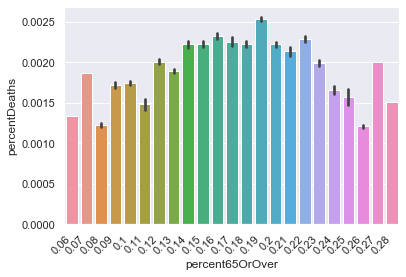

In [105]:
chart = sns.barplot(data=df, x="percent65OrOver", y="percentDeaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



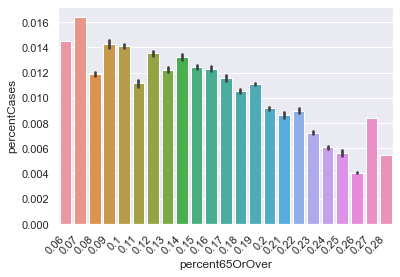

In [106]:
chart = sns.barplot(data=df, x="percent65OrOver", y="percentCases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#it shows the negative correlation of x and y


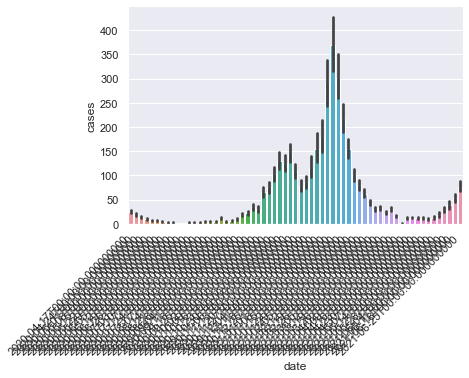

In [107]:
dfDate = df.sort_values(by='date')

chart = sns.barplot(data=dfDate, x="date", y="cases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




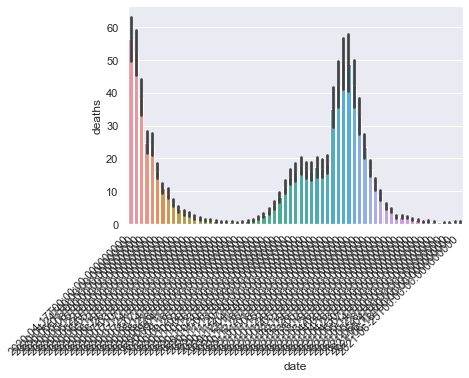

In [108]:


chart = sns.barplot(data=dfDate, x="date", y="deaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




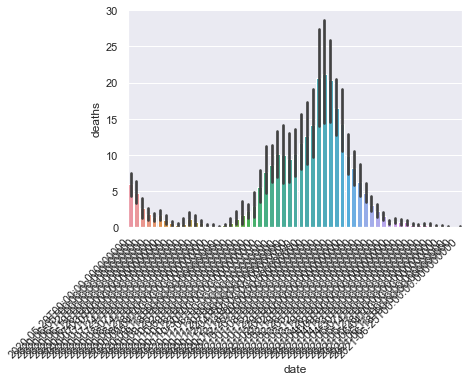

In [109]:

df = dfWales.sort_values(by="date")
chart = sns.barplot(data=df, x="date", y="deaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




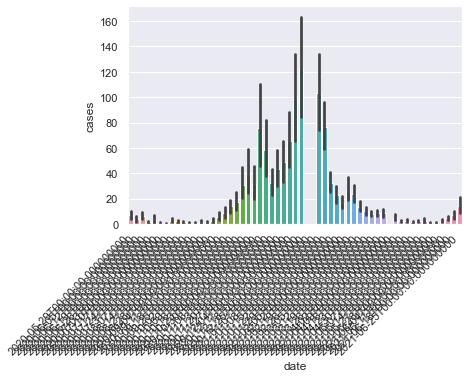

In [110]:

df = dfWales.sort_values(by="date")
chart = sns.barplot(data=df, x="date", y="cases")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()





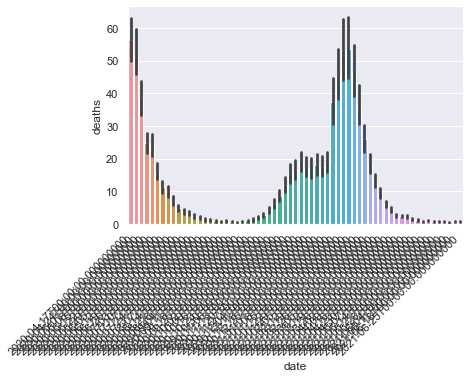

In [111]:
df = dfEngland.sort_values(by="date")
chart = sns.barplot(data=df, x="date", y="deaths")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

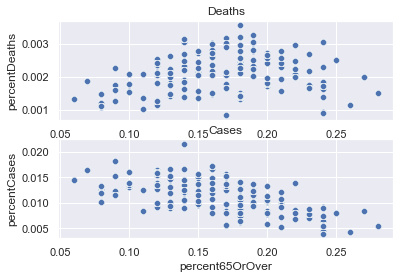

In [112]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Deaths')
axes[1].set_title('Cases')

p = sns.scatterplot(ax=axes[0], x='percent65OrOver',y='percentDeaths', data=dfEngland)

q = sns.scatterplot(ax=axes[1], x='percent65OrOver',y='percentCases', data=dfEngland)

#in England the data shows more deaths in areas with a higher percentage of 65+ residents
#The second graph shows that there is less of a correlation between percentage of 65+ residents and cases

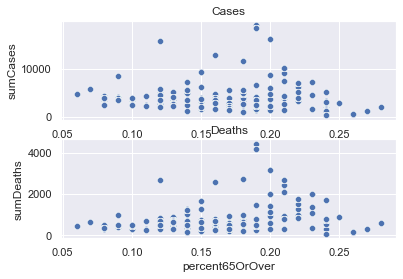

In [113]:
fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

p = sns.scatterplot(ax=axes[0], x='percent65OrOver',y='sumCases', data=dfEngland)

q = sns.scatterplot(ax=axes[1], x='percent65OrOver',y='sumDeaths', data=dfEngland)

#in England the data shows a higher likelihood of death in areas with a higher percentage of 65+ residents
#The second graph shows that there is less of a correlation between percentage of 65+ residents and cases

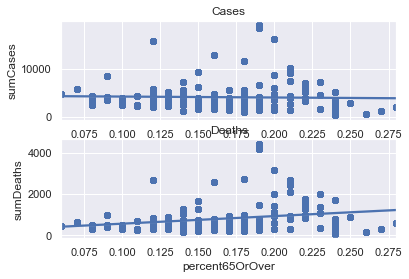

In [114]:
#lets fit regression model

fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

p = sns.regplot(ax=axes[0], x=dfEngland['percent65OrOver'].astype(float),y=dfEngland['sumCases'].astype(float), data=dfEngland)

q = sns.regplot(ax=axes[1], x=dfEngland['percent65OrOver'].astype(float),y=dfEngland['sumDeaths'].astype(float), data=dfEngland)



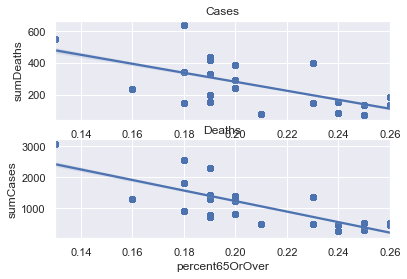

In [115]:
#lets fit regression model

fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

p = sns.regplot(ax=axes[0], x=dfWales['percent65OrOver'].astype(float),y=dfWales['sumDeaths'].astype(float), data=dfWales)

q = sns.regplot(ax=axes[1], x=dfWales['percent65OrOver'].astype(float),y=dfWales['sumCases'].astype(float), data=dfWales)



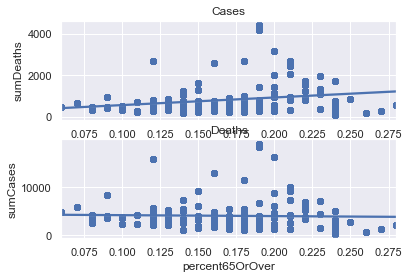

In [116]:
#lets fit regression model

fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')

p = sns.regplot(ax=axes[0], x=df['percent65OrOver'].astype(float),y=df['sumDeaths'].astype(float), data=df)

q = sns.regplot(ax=axes[1], x=df['percent65OrOver'].astype(float),y=df['sumCases'].astype(float), data=df)



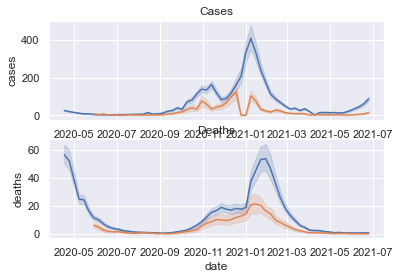

In [117]:

fig, axes = plt.subplots(2, 1)

axes[0].set_title('Cases')
axes[1].set_title('Deaths')


sns.lineplot(ax=axes[0],data=dfEngland, x="date", y="cases")
sns.lineplot(ax=axes[1],data=dfEngland, x="date", y="deaths")
sns.lineplot(ax=axes[0],data=dfWales, x="date", y="cases")
sns.lineplot(ax=axes[1],data=dfWales, x="date", y="deaths")

plt.show()

In [118]:





df.drop(df.iloc[:,9:99], inplace=True, axis=1)



In [119]:
df['percentDeaths'] = df['percentDeaths'].astype(float)
df['percentCases'] = df['percentCases'].astype(float)
df['percent65OrOver'] = df['percent65OrOver'].astype(float)



corr = df.corr(method='spearman').round(3)
corr.style.background_gradient(cmap='coolwarm')






,deaths,cases,all,90+,percent65OrOver,sumCases,sumDeaths,percentCases,percentDeaths
deaths,1.000000,0.485000,0.265000,0.251000,0.091000,0.282000,0.329000,0.039000,0.184000
cases,0.485000,1.000000,0.265000,0.204000,-0.012000,0.301000,0.292000,0.088000,0.120000
all,0.265000,0.265000,1.000000,0.831000,0.157000,0.848000,0.843000,-0.175000,-0.031000
90+,0.251000,0.204000,0.831000,1.000000,0.525000,0.588000,0.788000,-0.416000,0.068000
percent65OrOver,0.091000,-0.012000,0.157000,0.525000,1.000000,-0.115000,0.293000,-0.600000,0.215000
sumCases,0.282000,0.301000,0.848000,0.588000,-0.115000,1.000000,0.852000,0.294000,0.240000
sumDeaths,0.329000,0.292000,0.843000,0.788000,0.293000,0.852000,1.000000,0.045000,0.465000
percentCases,0.039000,0.088000,-0.175000,-0.416000,-0.600000,0.294000,0.045000,1.000000,0.496000
percentDeaths,0.184000,0.120000,-0.031000,0.068000,0.215000,0.240000,0.465000,0.496000,1.000000


In [120]:
dfEngland.drop(dfEngland.iloc[:,9:100], inplace=True, axis=1)

dfEngland['percentDeaths'] = dfEngland['percentDeaths'].astype(float)
dfEngland['percentCases'] = dfEngland['percentCases'].astype(float)
dfEngland['percent65OrOver'] = dfEngland['percent65OrOver'].astype(float)


corr = dfEngland.corr(method='spearman').round(3).style.background_gradient(cmap='coolwarm')



In [121]:
dfWales.drop(dfWales.iloc[:,9:100], inplace=True, axis=1)
dfWales['percentDeaths'] = dfWales['percentDeaths'].astype(float)
dfWales['percentCases'] = dfWales['percentCases'].astype(float)
dfWales['percent65OrOver'] = dfWales['percent65OrOver'].astype(float)


corr = dfWales.corr(method='spearman').round(3).style.background_gradient(cmap='coolwarm')




In [122]:


dfWalesDec


,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,0,...,86,87,88,89,90+,percent65OrOver,sumCases,sumDeaths,percentCases,percentDeaths
712,W06000023,Powys,utla,2021-02-12,7,41,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
713,W06000023,Powys,utla,2021-02-05,17,12,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
714,W06000023,Powys,utla,2021-01-29,13,22,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
715,W06000023,Powys,utla,2021-01-22,16,17,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
716,W06000023,Powys,utla,2021-01-15,13,50,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,W06000019,Blaenau Gwent,utla,2021-01-08,14,50,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10084,W06000019,Blaenau Gwent,utla,2021-01-01,16,0,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10085,W06000019,Blaenau Gwent,utla,2020-12-25,10,0,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10086,W06000019,Blaenau Gwent,utla,2020-12-18,7,89,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937


In [123]:
#The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship
#between features

import scipy.stats  as stats
stats.pearsonr(df['percent65OrOver'], df['sumDeaths'])

(0.2372451417791892, 1.7551434537722652e-118)

In [124]:
stats.pearsonr(df['percent65OrOver'], df['sumCases'])

(-0.028588504518611495, 0.005972294181542412)

In [125]:
stats.pearsonr(df['percent65OrOver'], df['deaths'])

(0.10158173313819996, 1.2155881353723127e-22)

In [126]:
stats.pearsonr(df['percent65OrOver'], df['cases'])

(-0.011235902550914981, 0.27998756013341725)

In [127]:
df.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,deaths,cases,all,90+,percent65OrOver,sumCases,sumDeaths,percentCases,percentDeaths
deaths,1.000000,0.484632,0.265311,0.250938,0.091007,0.282464,0.328575,0.038674,0.184173
cases,0.484632,1.000000,0.265064,0.203911,-0.011950,0.300796,0.291933,0.087883,0.119831
all,0.265311,0.265064,1.000000,0.830503,0.156531,0.848136,0.843276,-0.174995,-0.030518
90+,0.250938,0.203911,0.830503,1.000000,0.525104,0.587623,0.788197,-0.415974,0.068325
percent65OrOver,0.091007,-0.011950,0.156531,0.525104,1.000000,-0.115456,0.293285,-0.599905,0.215329
sumCases,0.282464,0.300796,0.848136,0.587623,-0.115456,1.000000,0.851700,0.293603,0.240378
sumDeaths,0.328575,0.291933,0.843276,0.788197,0.293285,0.851700,1.000000,0.045404,0.464874
percentCases,0.038674,0.087883,-0.174995,-0.415974,-0.599905,0.293603,0.045404,1.000000,0.496353
percentDeaths,0.184173,0.119831,-0.030518,0.068325,0.215329,0.240378,0.464874,0.496353,1.000000


In [128]:
demo = pd.read_excel('C:\\Users\\David\\Downloads\\demo.xlsx')
demo.rename(columns={"Code":"areaCode"}, inplace=True)
demo['zeroTo9'] = (demo['0']+demo['1']+demo['2']+demo['3']+demo['4']+demo['5']+demo['6']+demo['7']+demo['8']+demo['9'])
demo['tenTo19'] = (demo['10']+demo['11']+demo['12']+demo['13']+demo['14']+demo['15']+demo['16']+demo['17']+demo['18']+demo['19'])
demo['twentyTo29'] = (demo['20']+demo['21']+demo['22']+demo['23']+demo['24']+demo['25']+demo['26']+demo['27']+demo['28']+demo['29'])
demo['thirtyTo39'] = (demo['30']+demo['31']+demo['32']+demo['33']+demo['34']+demo['35']+demo['36']+demo['37']+demo['38']+demo['39'])
demo['fortyTo49'] = (demo['40']+demo['41']+demo['42']+demo['43']+demo['44']+demo['45']+demo['46']+demo['47']+demo['48']+demo['49'])
demo['fiftyTo59'] = (demo['50']+demo['51']+demo['52']+demo['53']+demo['54']+demo['55']+demo['56']+demo['57']+demo['58']+demo['59'])
demo['sixtyTo69'] = (demo['60']+demo['61']+demo['62']+demo['63']+demo['64']+demo['65']+demo['66']+demo['67']+demo['68']+demo['69'])
demo['seventyTo79'] = (demo['70']+demo['71']+demo['72']+demo['73']+demo['74']+demo['75']+demo['76']+demo['77']+demo['78']+demo['79'])
demo['eightyTo89'] = (demo['80']+demo['81']+demo['82']+demo['83']+demo['84']+demo['85']+demo['86']+demo['87']+demo['88']+demo['89'])


In [129]:
demo['totalPop'] = demo['90+']+demo['zeroTo9']+demo['tenTo19']+demo['twentyTo29']+demo['thirtyTo39']+demo['fortyTo49']+demo['fiftyTo59']+demo['sixtyTo69']+demo['seventyTo79']+demo['eightyTo89']

In [130]:
# dropping columns
demo.drop(columns=demo.iloc[0:,1:94].columns.tolist(), inplace=True)

demo = demo.rename(columns={'90+': 'ninetyPlus'})

In [131]:
demo.pop('totalPop')

0      67081234
1      65185724
2      59719724
3      56550138
4       2680763
         ...   
415      117337
416      146452
417      139443
418      148953
419      181669
Name: totalPop, Length: 420, dtype: int64

In [132]:
demo

,areaCode,ninetyPlus,zeroTo9,tenTo19,twentyTo29,thirtyTo39,fortyTo49,fiftyTo59,sixtyTo69,seventyTo79,eightyTo89
0,K02000001,609503,7929743,7728794,8609788,8926075,8395510,9126868,7211199,5767665,2776089
1,K03000001,595576,7684133,7489909,8377645,8675141,8154627,8868782,7011486,5621069,2707356
2,K04000001,551827,7122424,6909708,7658686,7945406,7480337,8076325,6358484,5137029,2479498
3,E92000001,521067,6778905,6551450,7244015,7562861,7114942,7637133,5981113,4824120,2334532
4,E12000001,22576,294155,301194,355988,334271,310114,374722,321867,247406,118470
...,...,...,...,...,...,...,...,...,...,...,...
415,N09000006,915,15621,15486,12544,14885,15317,15865,13304,9201,4199
416,N09000007,1117,18441,17381,16379,19940,18856,21019,15485,11922,5912
417,N09000008,1150,16307,16704,15571,17003,17523,20579,16275,12441,5890
418,N09000009,947,21810,20202,17854,20886,19836,18718,14067,10019,4614


In [133]:
dfEngland = dfEngland.merge(demo,on="areaCode")
dfWales = dfWales.merge(demo,on="areaCode")

In [134]:
dfEngland

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,percent65OrOver,...,ninetyPlus,zeroTo9,tenTo19,twentyTo29,thirtyTo39,fortyTo49,fiftyTo59,sixtyTo69,seventyTo79,eightyTo89
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37,Redcar and Cleveland,Unitary Authority,137228,0.21,...,1365,15243,14942,15184,15905,15071,20223,17559,14764,6972
1,E06000003,Redcar and Cleveland,utla,2021-06-18,0,12,Redcar and Cleveland,Unitary Authority,137228,0.21,...,1365,15243,14942,15184,15905,15071,20223,17559,14764,6972
2,E06000003,Redcar and Cleveland,utla,2021-06-11,0,6,Redcar and Cleveland,Unitary Authority,137228,0.21,...,1365,15243,14942,15184,15905,15071,20223,17559,14764,6972
3,E06000003,Redcar and Cleveland,utla,2021-06-04,0,6,Redcar and Cleveland,Unitary Authority,137228,0.21,...,1365,15243,14942,15184,15905,15071,20223,17559,14764,6972
4,E06000003,Redcar and Cleveland,utla,2021-05-28,0,1,Redcar and Cleveland,Unitary Authority,137228,0.21,...,1365,15243,14942,15184,15905,15071,20223,17559,14764,6972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,E10000012,Essex,utla,2020-05-15,95,12,Essex,County,1497759,0.19,...,15314,176961,169730,167313,184719,188727,211762,167258,145969,70006
9243,E10000012,Essex,utla,2020-05-08,107,35,Essex,County,1497759,0.19,...,15314,176961,169730,167313,184719,188727,211762,167258,145969,70006
9244,E10000012,Essex,utla,2020-05-01,162,34,Essex,County,1497759,0.19,...,15314,176961,169730,167313,184719,188727,211762,167258,145969,70006
9245,E10000012,Essex,utla,2020-04-24,252,50,Essex,County,1497759,0.19,...,15314,176961,169730,167313,184719,188727,211762,167258,145969,70006


In [135]:
dfWales

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,percent65OrOver,...,ninetyPlus,zeroTo9,tenTo19,twentyTo29,thirtyTo39,fortyTo49,fiftyTo59,sixtyTo69,seventyTo79,eightyTo89
0,W06000023,Powys,utla,2021-06-25,0,2,Powys,Unitary Authority,133030,0.26,...,1774,12530,13764,12623,12459,14107,20536,20055,17219,7963
1,W06000023,Powys,utla,2021-06-18,0,11,Powys,Unitary Authority,133030,0.26,...,1774,12530,13764,12623,12459,14107,20536,20055,17219,7963
2,W06000023,Powys,utla,2021-06-11,0,0,Powys,Unitary Authority,133030,0.26,...,1774,12530,13764,12623,12459,14107,20536,20055,17219,7963
3,W06000023,Powys,utla,2021-06-04,1,0,Powys,Unitary Authority,133030,0.26,...,1774,12530,13764,12623,12459,14107,20536,20055,17219,7963
4,W06000023,Powys,utla,2021-05-28,0,1,Powys,Unitary Authority,133030,0.26,...,1774,12530,13764,12623,12459,14107,20536,20055,17219,7963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,W06000019,Blaenau Gwent,utla,2020-07-03,0,2,Blaenau Gwent,Unitary Authority,70020,0.19,...,560,7506,7465,8787,8951,8235,10543,8181,6845,2947
1242,W06000019,Blaenau Gwent,utla,2020-06-26,1,1,Blaenau Gwent,Unitary Authority,70020,0.19,...,560,7506,7465,8787,8951,8235,10543,8181,6845,2947
1243,W06000019,Blaenau Gwent,utla,2020-06-19,0,2,Blaenau Gwent,Unitary Authority,70020,0.19,...,560,7506,7465,8787,8951,8235,10543,8181,6845,2947
1244,W06000019,Blaenau Gwent,utla,2020-06-12,0,3,Blaenau Gwent,Unitary Authority,70020,0.19,...,560,7506,7465,8787,8951,8235,10543,8181,6845,2947


In [136]:
#tomorrow:
#add age hue to the graphs that show case/death numbers over time
#re do the visualisatiosn with the age range features rather than the sixtyfivepluspercent feature

In [137]:
#add density and median age to table



medAge = pd.read_excel('C:\\Users\\David\\Downloads\\medianAge.xlsx')


In [138]:

medAge = pd.read_excel('C:\\Users\\David\\Downloads\\medianAge.xlsx')
popDen = pd.read_excel('C:\\Users\\David\\Downloads\\populationDensity.xlsx')

In [139]:
medAge.rename(columns={"Code":"areaCode"}, inplace=True)


In [140]:

popDen.drop(columns=popDen.iloc[:,6:100].columns.tolist(), inplace=True)

In [141]:
popDen.rename(columns={"Code":"areaCode"}, inplace=True)
popDen.pop('Name')


0               UNITED KINGDOM
1                GREAT BRITAIN
2            ENGLAND AND WALES
3                      ENGLAND
4                   NORTH EAST
                ...           
415        Fermanagh and Omagh
416    Lisburn and Castlereagh
417        Mid and East Antrim
418                 Mid Ulster
419     Newry, Mourne and Down
Name: Name, Length: 420, dtype: object

In [142]:
popDen.pop('Geography')
popDen.rename(columns={"Area (sq km)":"areaSq","Estimated population mid-2020":"estPop","2020 people per sq.km":"ppSq"}, inplace=True)

In [143]:
s = medAge.iloc[0:,4:94]
medAge.drop(columns=s, inplace=True)

In [144]:
dfEngland = dfEngland.merge(medAge,on='areaCode')
dfEngland = dfEngland.rename(columns={"Mid-2020":"medAge"})
dfWales = dfWales.merge(medAge,on='areaCode')
dfWales = dfWales.rename(columns={"Mid-2020":"medAge"})

In [145]:
dfEngland = dfEngland.merge(popDen,on='areaCode')
dfWales = dfWales.merge(popDen,on='areaCode')

In [146]:
dfEngland.to_excel ('C:\\Users\\David\\Downloads\\masterDfEngland.xlsx')
dfWales.to_excel ('C:\\Users\\David\\Downloads\\masterDfWales.xlsx')

In [147]:
dfEngland

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,percent65OrOver,...,fiftyTo59,sixtyTo69,seventyTo79,eightyTo89,Name,Geography,medAge,areaSq,estPop,2020 people per sq. km
0,E06000003,Redcar and Cleveland,utla,2021-06-25,0,37,Redcar and Cleveland,Unitary Authority,137228,0.21,...,20223,17559,14764,6972,Redcar and Cleveland,Unitary Authority,45.25,245.0698,137228,559.954756
1,E06000003,Redcar and Cleveland,utla,2021-06-18,0,12,Redcar and Cleveland,Unitary Authority,137228,0.21,...,20223,17559,14764,6972,Redcar and Cleveland,Unitary Authority,45.25,245.0698,137228,559.954756
2,E06000003,Redcar and Cleveland,utla,2021-06-11,0,6,Redcar and Cleveland,Unitary Authority,137228,0.21,...,20223,17559,14764,6972,Redcar and Cleveland,Unitary Authority,45.25,245.0698,137228,559.954756
3,E06000003,Redcar and Cleveland,utla,2021-06-04,0,6,Redcar and Cleveland,Unitary Authority,137228,0.21,...,20223,17559,14764,6972,Redcar and Cleveland,Unitary Authority,45.25,245.0698,137228,559.954756
4,E06000003,Redcar and Cleveland,utla,2021-05-28,0,1,Redcar and Cleveland,Unitary Authority,137228,0.21,...,20223,17559,14764,6972,Redcar and Cleveland,Unitary Authority,45.25,245.0698,137228,559.954756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,E10000012,Essex,utla,2020-05-15,95,12,Essex,County,1497759,0.19,...,211762,167258,145969,70006,Essex,County,42.72,3458.4263,1497759,433.075298
9243,E10000012,Essex,utla,2020-05-08,107,35,Essex,County,1497759,0.19,...,211762,167258,145969,70006,Essex,County,42.72,3458.4263,1497759,433.075298
9244,E10000012,Essex,utla,2020-05-01,162,34,Essex,County,1497759,0.19,...,211762,167258,145969,70006,Essex,County,42.72,3458.4263,1497759,433.075298
9245,E10000012,Essex,utla,2020-04-24,252,50,Essex,County,1497759,0.19,...,211762,167258,145969,70006,Essex,County,42.72,3458.4263,1497759,433.075298


In [148]:
dfWales

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,percent65OrOver,...,fiftyTo59,sixtyTo69,seventyTo79,eightyTo89,Name,Geography,medAge,areaSq,estPop,2020 people per sq. km
0,W06000023,Powys,utla,2021-06-25,0,2,Powys,Unitary Authority,133030,0.26,...,20536,20055,17219,7963,Powys,Unitary Authority,50.57,5180.6705,133030,25.678143
1,W06000023,Powys,utla,2021-06-18,0,11,Powys,Unitary Authority,133030,0.26,...,20536,20055,17219,7963,Powys,Unitary Authority,50.57,5180.6705,133030,25.678143
2,W06000023,Powys,utla,2021-06-11,0,0,Powys,Unitary Authority,133030,0.26,...,20536,20055,17219,7963,Powys,Unitary Authority,50.57,5180.6705,133030,25.678143
3,W06000023,Powys,utla,2021-06-04,1,0,Powys,Unitary Authority,133030,0.26,...,20536,20055,17219,7963,Powys,Unitary Authority,50.57,5180.6705,133030,25.678143
4,W06000023,Powys,utla,2021-05-28,0,1,Powys,Unitary Authority,133030,0.26,...,20536,20055,17219,7963,Powys,Unitary Authority,50.57,5180.6705,133030,25.678143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,W06000019,Blaenau Gwent,utla,2020-07-03,0,2,Blaenau Gwent,Unitary Authority,70020,0.19,...,10543,8181,6845,2947,Blaenau Gwent,Unitary Authority,42.84,108.7279,70020,643.992940
1242,W06000019,Blaenau Gwent,utla,2020-06-26,1,1,Blaenau Gwent,Unitary Authority,70020,0.19,...,10543,8181,6845,2947,Blaenau Gwent,Unitary Authority,42.84,108.7279,70020,643.992940
1243,W06000019,Blaenau Gwent,utla,2020-06-19,0,2,Blaenau Gwent,Unitary Authority,70020,0.19,...,10543,8181,6845,2947,Blaenau Gwent,Unitary Authority,42.84,108.7279,70020,643.992940
1244,W06000019,Blaenau Gwent,utla,2020-06-12,0,3,Blaenau Gwent,Unitary Authority,70020,0.19,...,10543,8181,6845,2947,Blaenau Gwent,Unitary Authority,42.84,108.7279,70020,643.992940


In [150]:
dfWalesDec

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,0,...,86,87,88,89,90+,percent65OrOver,sumCases,sumDeaths,percentCases,percentDeaths
712,W06000023,Powys,utla,2021-02-12,7,41,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
713,W06000023,Powys,utla,2021-02-05,17,12,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
714,W06000023,Powys,utla,2021-01-29,13,22,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
715,W06000023,Powys,utla,2021-01-22,16,17,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
716,W06000023,Powys,utla,2021-01-15,13,50,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,W06000019,Blaenau Gwent,utla,2021-01-08,14,50,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10084,W06000019,Blaenau Gwent,utla,2021-01-01,16,0,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10085,W06000019,Blaenau Gwent,utla,2020-12-25,10,0,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10086,W06000019,Blaenau Gwent,utla,2020-12-18,7,89,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937


In [151]:
dfWalesFeb

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,0,...,86,87,88,89,90+,percent65OrOver,sumCases,sumDeaths,percentCases,percentDeaths
704,W06000023,Powys,utla,2021-04-09,1,3,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
705,W06000023,Powys,utla,2021-04-02,1,0,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
706,W06000023,Powys,utla,2021-03-26,3,1,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
707,W06000023,Powys,utla,2021-03-19,9,1,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
708,W06000023,Powys,utla,2021-03-12,5,5,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,W06000019,Blaenau Gwent,utla,2021-03-19,0,3,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10074,W06000019,Blaenau Gwent,utla,2021-03-12,0,5,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10075,W06000019,Blaenau Gwent,utla,2021-03-05,1,2,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10076,W06000019,Blaenau Gwent,utla,2021-02-26,2,10,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937


In [152]:
dfWalesApril

,areaCode,areaName,areaType,date,deaths,cases,name,geography,all,0,...,86,87,88,89,90+,percent65OrOver,sumCases,sumDeaths,percentCases,percentDeaths
693,W06000023,Powys,utla,2021-06-25,0,2,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
694,W06000023,Powys,utla,2021-06-18,0,11,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
695,W06000023,Powys,utla,2021-06-11,0,0,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
696,W06000023,Powys,utla,2021-06-04,1,0,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
697,W06000023,Powys,utla,2021-05-28,0,1,Powys,Unitary Authority,133030,1048,...,660,590,517,490,1774,0.26,520,184,0.00390889,0.00138315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10065,W06000019,Blaenau Gwent,utla,2021-05-14,0,2,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10066,W06000019,Blaenau Gwent,utla,2021-05-07,0,0,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10067,W06000019,Blaenau Gwent,utla,2021-04-30,0,1,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
10068,W06000019,Blaenau Gwent,utla,2021-04-23,0,0,Blaenau Gwent,Unitary Authority,70020,711,...,204,241,165,139,560,0.19,719,154,0.0102685,0.00219937
